The environment to run this file is VS Code,Jupyter Notebook,  python 3.8.10, other environment may cause bug or warning report

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import shapiro
from scipy.stats import norm, probplot
from scipy.stats.mstats import rankdata
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from prettytable import PrettyTable
from sklearn.linear_model import LinearRegression


In [2]:
#Combine the dataset
df_before = pd.read_csv('online_retail_II_B2010.csv')
df_after = pd.read_csv('online_retail_II_After2010.csv')
frame = [df_before,df_after]
df = pd.concat(frame)
#df.to_csv('online_retail_II.csv')

In [3]:
#understand dataset
type = df.dtypes
print(type,type.value_counts())


Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object object     5
float64    2
int64      1
dtype: int64


In [4]:
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

      InvoiceDate  Price  Customer ID         Country  
0  2009/12/1 7:45   6.95      13085.0  United Kingdom  
1  2009/12/1 7:45   6.75      13085.0  United Kingdom  
2  2009/12/1 7:45   6.75      13085.0  United Kingdom  
3  2009/12/1 7:45   2.10      13085.0  United Kingdom  
4  2009/12/1 7:45   1.25      13085.0  United Kingdom  


In [5]:
print(df.shape)

(1067371, 8)


In [6]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [7]:
df_cleaned = df.dropna()

In [8]:
print('Below is the sum of the count of NA values for each columns after dropna')
print(df_cleaned.isna().sum())

Below is the sum of the count of NA values for each columns after dropna
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [9]:
df_cleaned.shape

(824364, 8)

In [10]:
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009/12/1 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009/12/1 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009/12/1 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009/12/1 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009/12/1 7:45,1.25,13085.0,United Kingdom


Drop duplicated

In [11]:
df_cleaned.duplicated().sum()

26479

In [12]:
df_cleaned = df_cleaned.drop_duplicates()

In [13]:
df_cleaned.shape

(797885, 8)

In [14]:
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009/12/1 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009/12/1 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009/12/1 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009/12/1 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009/12/1 7:45,1.25,13085.0,United Kingdom


In [15]:
df_cleaned.duplicated().sum()

0

Remove outliers


In [16]:
#calculate the bounds
Q1 = df_cleaned['Price'].quantile(0.25)
Q3 = df_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [17]:
#identify and remove the outliers
outliers = (df_cleaned['Price'] < lower_bound) | (df_cleaned['Price'] > upper_bound)
df_cleaned = df_cleaned[~outliers]

In [18]:
#calculate the bounds
Q1 = df_cleaned['Quantity'].quantile(0.25)
Q3 = df_cleaned['Quantity'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [19]:
#identify and remove the outliers
outliers = (df_cleaned['Quantity'] < lower_bound) | (df_cleaned['Quantity'] > upper_bound)
df_cleaned = df_cleaned[~outliers]

In [20]:
print('Below is showing how many outliers was removed in each columns: \n',df_cleaned.isna().sum())

Below is showing how many outliers was removed in each columns: 
 Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [21]:
df_cleaned = df_cleaned.dropna()

In [22]:
df_cleaned.shape

(676146, 8)

In [23]:
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009/12/1 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009/12/1 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009/12/1 7:45,6.75,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009/12/1 7:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009/12/1 7:45,1.65,13085.0,United Kingdom


Principal Component Analysis

In [24]:

df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


In [25]:
df_cleaned.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom


In [26]:
#Adding new column
df_cleaned['Total_Sales'] = df_cleaned['Quantity'] * df_cleaned['Price']

In [27]:
df_2 = copy.deepcopy(df_cleaned)

In [28]:
#Standardize the numeric columns
scaler = StandardScaler()
num_cols = ['Quantity','Price','Customer ID','Total_Sales']
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

In [29]:
X = df_cleaned[num_cols].values

pca = PCA(n_components= 4)
pca.fit(X)
X_pca = pca.transform(X)
explained = pca.explained_variance_ratio_
print('Explained variance ratio:', explained)

Explained variance ratio: [0.3989589  0.31625391 0.2380821  0.04670509]


In [30]:
cond_num = np.linalg.cond(X)
print("Condition number:", cond_num)
singular_values = pca.singular_values_
print("Singular values:", singular_values)


Condition number: 2.922684820679277
Singular values: [1038.75784352  924.84337279  802.44192691  355.41220051]


Normality test

In [31]:
def normality_test(data,title,alpha):
    stat, p = shapiro(data)
    print(f'Test statistic: {stat}')
    print(f'p-value: {p}')
    print(f'The alpha for this test is {alpha}')
    if p > alpha:
        print(f'Sample {title} looks Gaussian (fail to reject H0)')
    else:
        print(f'Sample {title} does not look Gaussian (reject H0)')

In [32]:
normality_test(df_cleaned['Quantity'],'Quantity',0.05)

Test statistic: 0.85204017162323
p-value: 0.0
The alpha for this test is 0.05
Sample Quantity does not look Gaussian (reject H0)


d:\Python\Python38\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [33]:
normality_test(df_cleaned['Price'],'Price',0.05)

Test statistic: 0.8894263505935669
p-value: 0.0
The alpha for this test is 0.05
Sample Price does not look Gaussian (reject H0)


In [34]:
normality_test(df_cleaned['Total_Sales'],'Total_Sales',0.05)

Test statistic: 0.7569440603256226
p-value: 0.0
The alpha for this test is 0.05
Sample Total_Sales does not look Gaussian (reject H0)


Data Transformation

In [35]:
#Data Transformation function
def transfor(data):
    z = norm.ppf(rankdata(data) / (len(data) + 1))
    return z

In [36]:
#Apply the function to Quantity
df_cleaned['Quantity_norm'] = transfor(df_cleaned['Quantity'])

In [37]:
#Apply the function to Price
df_cleaned['Price_norm'] = transfor(df_cleaned['Price'])

In [38]:
#Apply the function to Total_Sales
df_cleaned['Total_Sales_norm'] = transfor(df_cleaned['Total_Sales'])

#Quantity

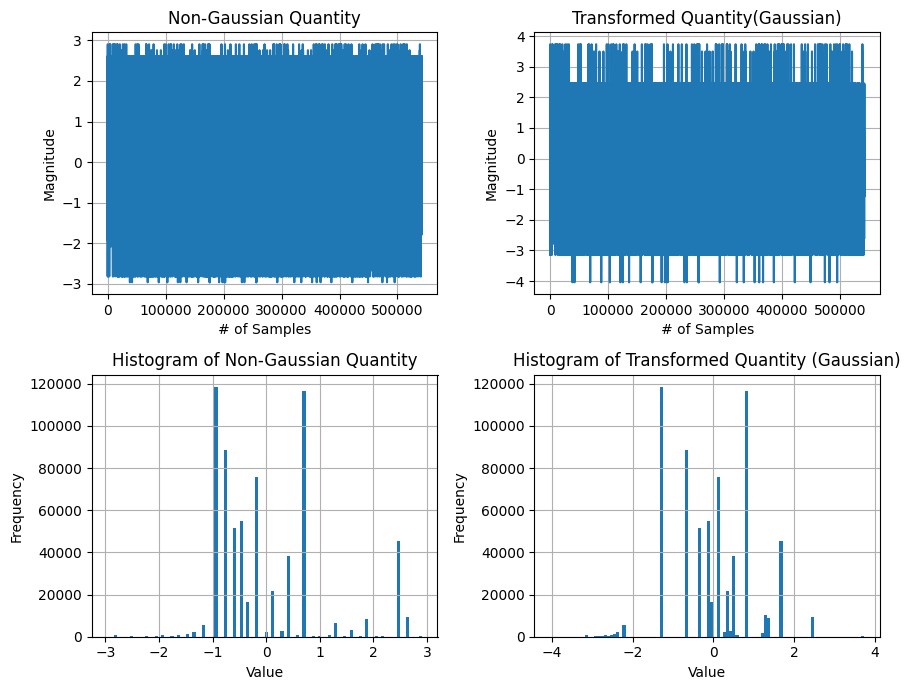

In [39]:
#Plot the compare graphs
fig, axs = plt.subplots(2, 2, figsize=(9, 7))

axs[0, 0].plot(df_cleaned['Quantity'])
axs[0, 0].set_title('Non-Gaussian Quantity')
axs[0, 0].set_xlabel('# of Samples')
axs[0, 0].set_ylabel('Magnitude')
axs[0, 0].grid(True)

axs[0, 1].plot(df_cleaned['Quantity_norm'])
axs[0, 1].set_title('Transformed Quantity(Gaussian)')
axs[0, 1].set_xlabel('# of Samples')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].grid(True)

axs[1, 0].hist(df_cleaned['Quantity'], bins=100)
axs[1, 0].set_title('Histogram of Non-Gaussian Quantity')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

axs[1, 1].hist(df_cleaned['Quantity_norm'], bins=100)
axs[1, 1].set_title('Histogram of Transformed Quantity (Gaussian)')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

fig.tight_layout()
plt.show()

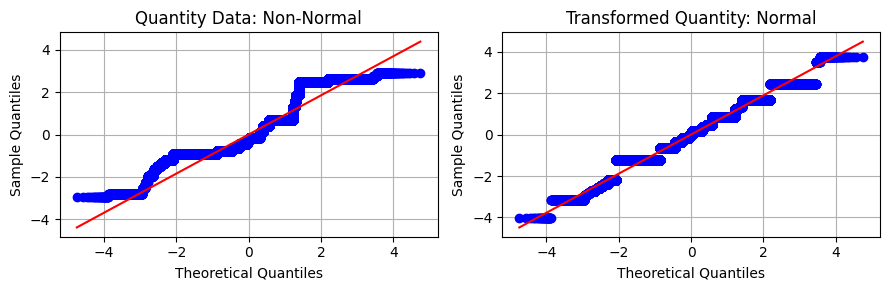

In [40]:
#QQ plot
fig2, axs2 = plt.subplots(1, 2, figsize=(9, 3))
probplot(df_cleaned['Quantity'], plot=axs2[0], dist='norm')
axs2[0].set_title('Quantity Data: Non-Normal')
axs2[0].set_xlabel('Theoretical Quantiles')
axs2[0].set_ylabel('Sample Quantiles')
axs2[0].grid(True)

probplot(df_cleaned['Quantity_norm'], plot=axs2[1], dist='norm')
axs2[1].set_title('Transformed Quantity: Normal')
axs2[1].set_xlabel('Theoretical Quantiles')
axs2[1].set_ylabel('Sample Quantiles')
axs2[1].grid(True)

fig2.tight_layout()
plt.show()

#Price

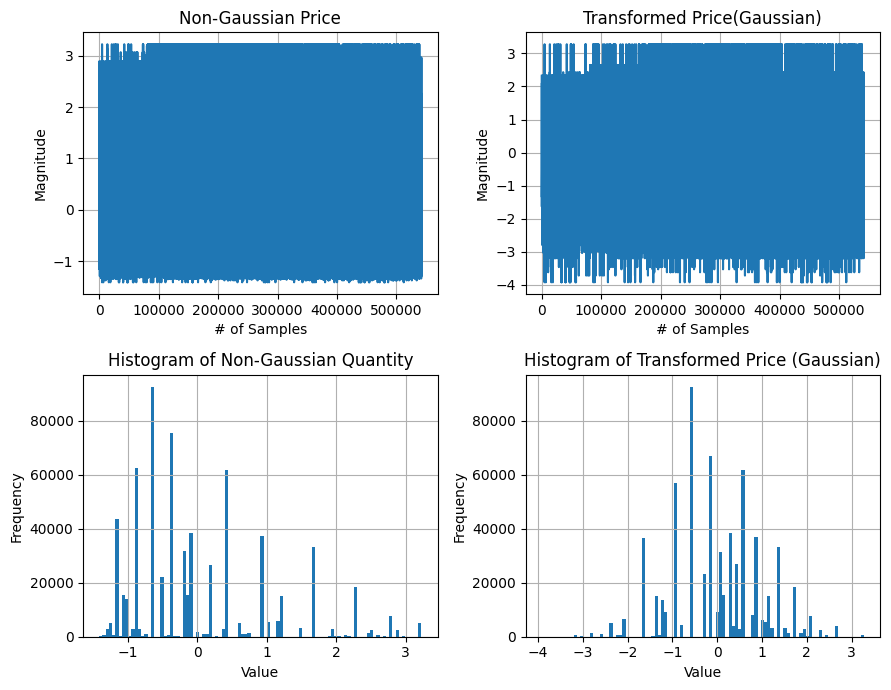

In [41]:
#Plot the compare graphs
fig, axs = plt.subplots(2, 2, figsize=(9, 7))

axs[0, 0].plot(df_cleaned['Price'])
axs[0, 0].set_title('Non-Gaussian Price')
axs[0, 0].set_xlabel('# of Samples')
axs[0, 0].set_ylabel('Magnitude')
axs[0, 0].grid(True)

axs[0, 1].plot(df_cleaned['Price_norm'])
axs[0, 1].set_title('Transformed Price(Gaussian)')
axs[0, 1].set_xlabel('# of Samples')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].grid(True)

axs[1, 0].hist(df_cleaned['Price'], bins=100)
axs[1, 0].set_title('Histogram of Non-Gaussian Quantity')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

axs[1, 1].hist(df_cleaned['Price_norm'], bins=100)
axs[1, 1].set_title('Histogram of Transformed Price (Gaussian)')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

fig.tight_layout()
plt.show()

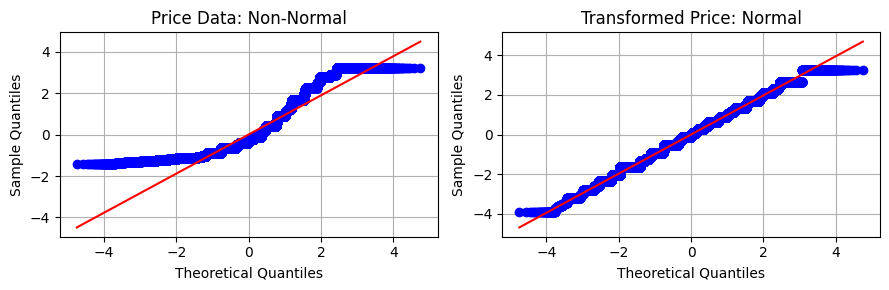

In [42]:
#QQ plot
fig2, axs2 = plt.subplots(1, 2, figsize=(9, 3))
probplot(df_cleaned['Price'], plot=axs2[0], dist='norm')
axs2[0].set_title('Price Data: Non-Normal')
axs2[0].set_xlabel('Theoretical Quantiles')
axs2[0].set_ylabel('Sample Quantiles')
axs2[0].grid(True)

probplot(df_cleaned['Price_norm'], plot=axs2[1], dist='norm')
axs2[1].set_title('Transformed Price: Normal')
axs2[1].set_xlabel('Theoretical Quantiles')
axs2[1].set_ylabel('Sample Quantiles')
axs2[1].grid(True)

fig2.tight_layout()
plt.show()

#Total_Sale

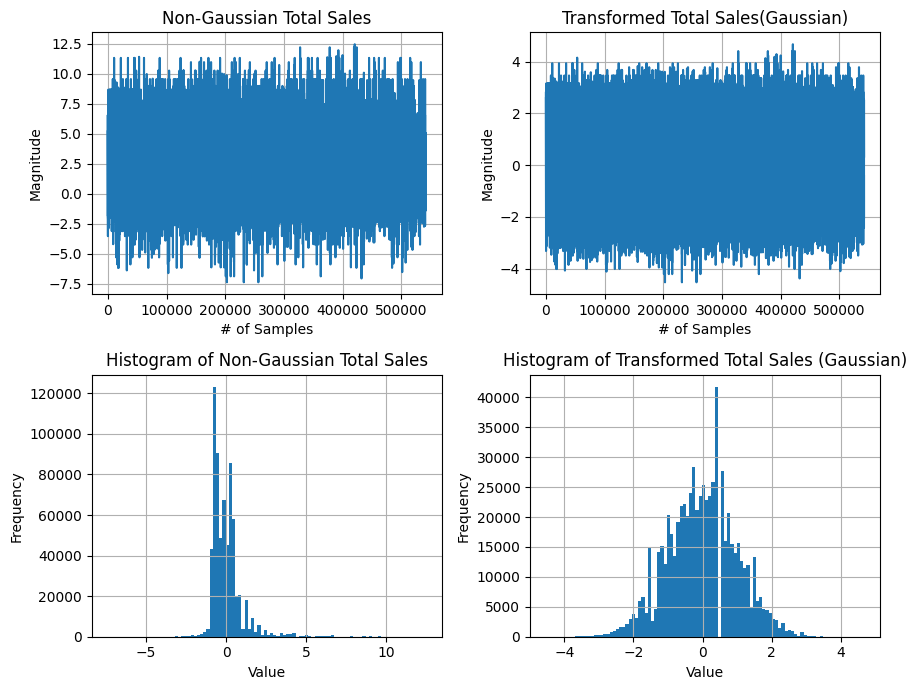

In [43]:
#Plot the compare graphs
fig, axs = plt.subplots(2, 2, figsize=(9, 7))

axs[0, 0].plot(df_cleaned['Total_Sales'])
axs[0, 0].set_title('Non-Gaussian Total Sales')
axs[0, 0].set_xlabel('# of Samples')
axs[0, 0].set_ylabel('Magnitude')
axs[0, 0].grid(True)

axs[0, 1].plot(df_cleaned['Total_Sales_norm'])
axs[0, 1].set_title('Transformed Total Sales(Gaussian)')
axs[0, 1].set_xlabel('# of Samples')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].grid(True)

axs[1, 0].hist(df_cleaned['Total_Sales'], bins=100)
axs[1, 0].set_title('Histogram of Non-Gaussian Total Sales')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

axs[1, 1].hist(df_cleaned['Total_Sales_norm'], bins=100)
axs[1, 1].set_title('Histogram of Transformed Total Sales (Gaussian)')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

fig.tight_layout()
plt.show()

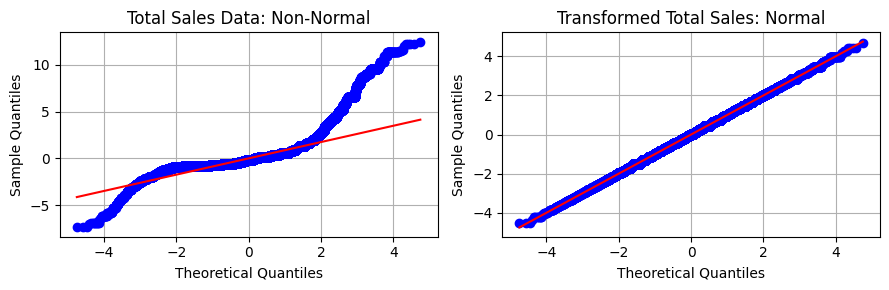

In [44]:
#QQ plot
fig2, axs2 = plt.subplots(1, 2, figsize=(9, 3))
probplot(df_cleaned['Total_Sales'], plot=axs2[0], dist='norm')
axs2[0].set_title('Total Sales Data: Non-Normal')
axs2[0].set_xlabel('Theoretical Quantiles')
axs2[0].set_ylabel('Sample Quantiles')
axs2[0].grid(True)

probplot(df_cleaned['Total_Sales_norm'], plot=axs2[1], dist='norm')
axs2[1].set_title('Transformed Total Sales: Normal')
axs2[1].set_xlabel('Theoretical Quantiles')
axs2[1].set_ylabel('Sample Quantiles')
axs2[1].grid(True)

fig2.tight_layout()
plt.show()

Heatmap & Pearson correlation coefficient matrix:

In [45]:
df_2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6


In [46]:
# drop unwanted columns and plot the graph
temp = df_2



In [47]:
temp.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
Total_Sales           float64
dtype: object

In [48]:
temp = temp.drop(columns= ['Invoice','InvoiceDate','StockCode','Description','Country'])
temp.head()

,Quantity,Price,Customer ID,Total_Sales
0,12,6.95,13085.0,83.4
1,12,6.75,13085.0,81.0
2,12,6.75,13085.0,81.0
4,24,1.25,13085.0,30.0
5,24,1.65,13085.0,39.6


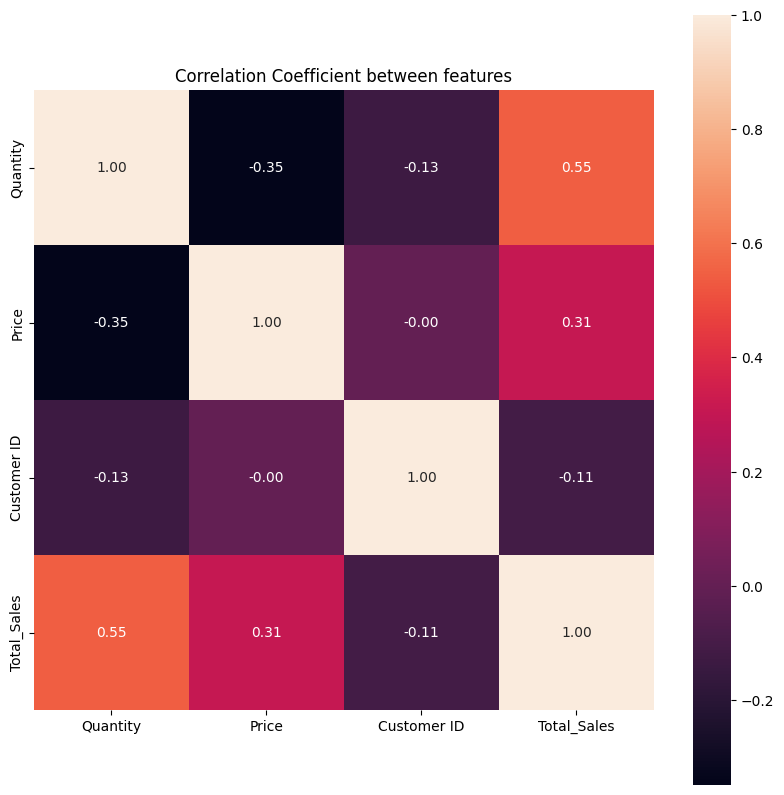

In [49]:
corr_matrix = np.corrcoef(temp, rowvar=False)
fig, ax = plt.subplots(figsize=(10, 10)
)
sns.heatmap(corr_matrix, annot=True,xticklabels=temp.columns[0:],yticklabels=temp.columns[0:], fmt=".2f", square=True, ax=ax)
ax.set_title("Correlation Coefficient between features")
plt.show()

Statistics

In [50]:
# List unique values in certain columns
df_2.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Sales
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [51]:
df_2.count()

Invoice        676146
StockCode      676146
Description    676146
Quantity       676146
InvoiceDate    676146
Price          676146
Customer ID    676146
Country        676146
Total_Sales    676146
dtype: int64

In [52]:
# number of purchases made 
df_2['Invoice'].nunique()

38974

In [53]:
df_2['StockCode'].nunique()

4279

In [54]:
df['Price'].max()

38970.0

In [55]:
sorted_df = df.sort_values('Price', ascending=False)
sorted_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
222681,C556445,M,Manual,-1,2011/6/10 15:31,38970.00,15098.0,United Kingdom
241827,512771,M,Manual,1,2010/6/17 16:53,25111.09,NaN,United Kingdom
241824,C512770,M,Manual,-1,2010/6/17 16:52,25111.09,17399.0,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,2010/8/27 13:42,18910.69,NaN,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011/12/5 11:36,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011/1/5 9:55,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011/1/5 9:57,16453.71,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010/12/7 15:04,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010/12/7 15:08,13541.33,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010/12/7 15:49,13541.33,NaN,United Kingdom


In [56]:
df_2['Price'].min()

0.0

In [57]:
sorted_df = df.sort_values('Price', ascending=True)
sorted_df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010/4/29 13:36,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010/7/19 11:24,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010/10/20 12:04,-38925.87,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011/8/12 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011/8/12 14:52,-11062.06,NaN,United Kingdom


In [58]:
df_2['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'EIRE', 'Germany',
       'Portugal', 'Poland', 'Spain', 'Channel Islands', 'Netherlands',
       'Italy', 'Cyprus', 'Belgium', 'Greece', 'Norway', 'Austria',
       'Denmark', 'United Arab Emirates', 'Finland', 'Switzerland',
       'Sweden', 'USA', 'Japan', 'Unspecified', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Israel', 'Thailand', 'Lithuania',
       'Nigeria', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland',
       'Lebanon', 'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [59]:
#Split by country
# UK = df[df['Country'] == 'United Kingdom']
# France = df[df['Country'] == 'France']
# Australia = df[df['Country'] == 'Australia']
# EIRE = df[df['Country'] == 'EIRE']
# Germany = df[df['Country'] == 'Germany']
# Portugal = df[df['Country'] == 'Portugal']
# Poland = df[df['Country'] == 'Poland']
# Spain = df[df['Country'] == 'Spain']
# Channel_Islands = df[df['Country'] == 'Channel Islands']
# Netherlands = df[df['Country'] == 'Netherlands']
# Italy = df[df['Country'] == 'Italy']
# Cyprus = df[df['Country'] == 'Cyprus']
# Belgium = df[df['Country'] == 'Belgium']
# Greece = df[df['Country'] == 'Greece']
# Norway = df[df['Country'] == 'Norway']
# Austria = df[df['Country'] == 'Austria']
# Denmark = df[df['Country'] == 'Denmark']
# United_Arab_Emirates = df[df['Country'] == 'United Arab Emirates']
# Finland = df[df['Country'] == 'Finland']
# Switzerland = df[df['Country'] == 'Switzerland']
# Sweden = df[df['Country'] == 'Sweden']
# USA = df[df['Country'] == 'USA']
# Japan = df[df['Country'] == 'Japan']
# Unspecified = df[df['Country'] == 'Unspecified']
# Malta = df[df['Country'] == 'Malta']
# RSA = df[df['Country'] == 'RSA']
# Singapore = df[df['Country'] == 'Singapore']
# Bahrain = df[df['Country'] == 'Bahrain']
# Israel = df[df['Country'] == 'Israel']
# Thailand = df[df['Country'] == 'Thailand']
# Lithuania = df[df['Country'] == 'Lithuania']
# Nigeria = df[df['Country'] == 'Nigeria']
# West_ndies = df[df['Country'] == 'West Indies']
# Korea = df[df['Country'] == 'Korea']
# Brazil = df[df['Country'] == 'Brazil']
# Canada = df[df['Country'] == 'Canada']
# Iceland = df[df['Country'] == 'Iceland']
# Lebanon = df[df['Country'] == 'Lebanon']
# Saudi_Arabia = df[df['Country'] == 'Saudi Arabia']
# Czech_Republic = df[df['Country'] == 'Czech Republic']
# European_Community = df[df['Country'] == 'European Community']






In [60]:
stats_df = df_2.groupby('Country').agg({'Quantity': ['mean', 'median', 'var'],
                                      'Price': ['mean', 'median', 'var'],
                                      'Total_Sales': ['mean', 'median', 'var']})
table = PrettyTable()
table.field_names = ['Country', 'Quantity Mean', 'Quantity Median', 'Quantity Variance', 
                     'Price Mean', 'Price Median', 'Price Variance',
                     'Total Sales Mean', 'Total Sales Median', 'Total Sales Variance']
for index, row in stats_df.iterrows():
    table.add_row([index, 
                   round(row['Quantity']['mean'], 2), 
                   round(row['Quantity']['median'],2), 
                   round(row['Quantity']['var'], 2), 
                   round(row['Price']['mean'], 2), 
                   round(row['Price']['median'],2), 
                   round(row['Price']['var'], 2),
                   round(row['Total_Sales']['mean'], 2), 
                   round(row['Total_Sales']['median'],2), 
                   round(row['Total_Sales']['var'], 2)])
highest_quantity = stats_df['Quantity']['mean'].idxmax()
lowest_quantity = stats_df['Quantity']['mean'].idxmin()
highest_price = stats_df['Price']['mean'].idxmax()
lowest_price = stats_df['Price']['mean'].idxmin()
highest_sales = stats_df['Total_Sales']['mean'].idxmax()
lowest_sales = stats_df['Total_Sales']['mean'].idxmin()
table.add_row(['Highest', highest_quantity, highest_quantity, highest_quantity, 
               highest_price, highest_price, highest_price, 
               highest_sales, highest_sales, highest_sales])
table.add_row(['Lowest', lowest_quantity, lowest_quantity, lowest_quantity, 
               lowest_price, lowest_price, lowest_price, 
               lowest_sales, lowest_sales, lowest_sales])
table.title = 'Statistics Comparison'
print(table)


+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                  Statistics Comparison                                                                                   |
+----------------------+----------------+-----------------+-------------------+-------------+--------------+----------------+------------------+--------------------+----------------------+
|       Country        | Quantity Mean  | Quantity Median | Quantity Variance |  Price Mean | Price Median | Price Variance | Total Sales Mean | Total Sales Median | Total Sales Variance |
+----------------------+----------------+-----------------+-------------------+-------------+--------------+----------------+------------------+--------------------+----------------------+
|      Australia       |      9.85      |       10.0   

In [61]:
df_2['InvoiceYear'] = df_2['InvoiceDate'].dt.year


In [62]:
for year in df_2['InvoiceYear'].unique():
    for country in df_2['Country'].unique():
        temp = df_2[(df_2['InvoiceYear'] == year) & (df_2['Country'] == country)]
        if len(temp) == 0:
            print(f"No data for {year}, {country}")
        else:
            popular_product = temp['Description'].value_counts().index[0]
            total_sales = temp['Total_Sales'].sum()
            avg_price = temp['Price'].mean()
            print(f"In {year}, {country}, the most popular product was {popular_product} with total sales of {total_sales:.2f} and average price of {avg_price:.2f}")



In 2009, United Kingdom, the most popular product was WHITE HANGING HEART T-LIGHT HOLDER with total sales of 326700.43 and average price of 2.62
In 2009, France, the most popular product was LUNCHBOX WITH CUTLERY RETROSPOT  with total sales of 4250.30 and average price of 2.37
In 2009, Australia, the most popular product was PAPER BUNTING WHITE LACE with total sales of 70.65 and average price of 2.26
In 2009, EIRE, the most popular product was HOT WATER BOTTLE TEA AND SYMPATHY with total sales of 6638.26 and average price of 2.94
In 2009, Germany, the most popular product was RETRO SPORT PARTY BAG + STICKER SET with total sales of 6790.96 and average price of 2.32
In 2009, Portugal, the most popular product was BAKING SET 9 PIECE RETROSPOT  with total sales of 1865.82 and average price of 2.55
In 2009, Poland, the most popular product was PARTY CONE CHRISTMAS DECORATION  with total sales of 371.82 and average price of 1.83
In 2009, Spain, the most popular product was RED SPOTTY PURSE  

In [63]:
table = PrettyTable()
table.field_names = ["Year", "Country", "Popular Product", "Total Sales", "Avg. Price"]
for year in df_2['InvoiceYear'].unique():
    for country in df_2['Country'].unique():
        temp = df_2[(df_2['InvoiceYear'] == year) & (df_2['Country'] == country)]
        if len(temp) == 0:
            table.add_row([year, country, "No Data", "N/A", "N/A"])
        else:
            popular_product = temp['Description'].value_counts().index[0]
            total_sales = temp['Total_Sales'].sum()
            avg_price = temp['Price'].mean()
            table.add_row([year, country, popular_product, f"{total_sales:.2f}", f"{avg_price:.2f}"])
print(table)

+------+----------------------+-------------------------------------+-------------+------------+
| Year |       Country        |           Popular Product           | Total Sales | Avg. Price |
+------+----------------------+-------------------------------------+-------------+------------+
| 2009 |    United Kingdom    |  WHITE HANGING HEART T-LIGHT HOLDER |  326700.43  |    2.62    |
| 2009 |        France        |   LUNCHBOX WITH CUTLERY RETROSPOT   |   4250.30   |    2.37    |
| 2009 |      Australia       |       PAPER BUNTING WHITE LACE      |    70.65    |    2.26    |
| 2009 |         EIRE         |  HOT WATER BOTTLE TEA AND SYMPATHY  |   6638.26   |    2.94    |
| 2009 |       Germany        | RETRO SPORT PARTY BAG + STICKER SET |   6790.96   |    2.32    |
| 2009 |       Portugal       |    BAKING SET 9 PIECE RETROSPOT     |   1865.82   |    2.55    |
| 2009 |        Poland        |   PARTY CONE CHRISTMAS DECORATION   |    371.82   |    1.83    |
| 2009 |        Spain         

In [64]:
years = sorted(df_2['InvoiceYear'].unique())

for year in years:
    table = PrettyTable()
    table.title = f"Year {year}"
    table.field_names = ["Country", "Most Popular Product", "Total Sales", "Average Price"]
    
    countries = sorted(df_2[df_2['InvoiceYear'] == year]['Country'].unique())
    
    for country in countries:
        temp = df_2[(df_2['InvoiceYear'] == year) & (df_2['Country'] == country)]
        
        if len(temp) == 0:
            continue
        
        popular_product = temp['Description'].value_counts().index[0]
        total_sales = temp['Total_Sales'].sum()
        avg_price = temp['Price'].mean()
        
        table.add_row([country, popular_product, f"{total_sales:.2f}", f"{avg_price:.2f}"])
    
    print(table)

+------------------------------------------------------------------------------------------+
|                                        Year 2009                                         |
+----------------------+-------------------------------------+-------------+---------------+
|       Country        |         Most Popular Product        | Total Sales | Average Price |
+----------------------+-------------------------------------+-------------+---------------+
|      Australia       |       PAPER BUNTING WHITE LACE      |    70.65    |      2.26     |
|       Austria        |    MUSHROOM BLUE HOT WATER BOTTLE   |    734.74   |      2.72     |
|       Belgium        |      FOUR HOOK  WHITE LOVEBIRDS     |    254.75   |      2.45     |
|   Channel Islands    | SET/6 GOLD REINDEER T-LIGHT CANDLES |    784.08   |      3.05     |
|        Cyprus        |     GIN + TONIC DIET METAL SIGN     |   2572.63   |      3.30     |
|       Denmark        |    FAIRY CAKE BIRTHDAY CANDLE SET   |    340.

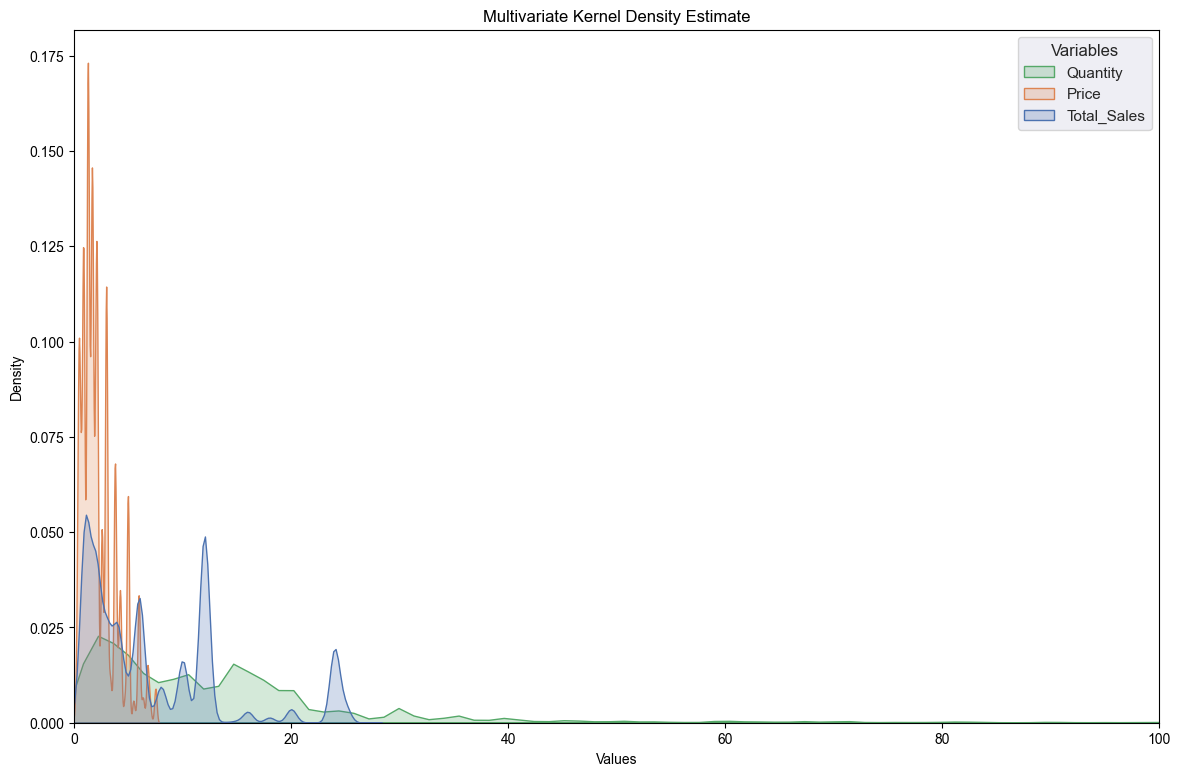

In [65]:
#kde
cols = ['Quantity', 'Price', 'Total_Sales']
fig, ax = plt.subplots(figsize=(14, 9))
sns.set(style="darkgrid")
sns.kdeplot(data=df_2[cols], fill=True)
plt.xlim(0,100)
plt.title('Multivariate Kernel Density Estimate')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend(title='Variables', loc='upper right', labels=cols)
plt.show()

Data Visualization

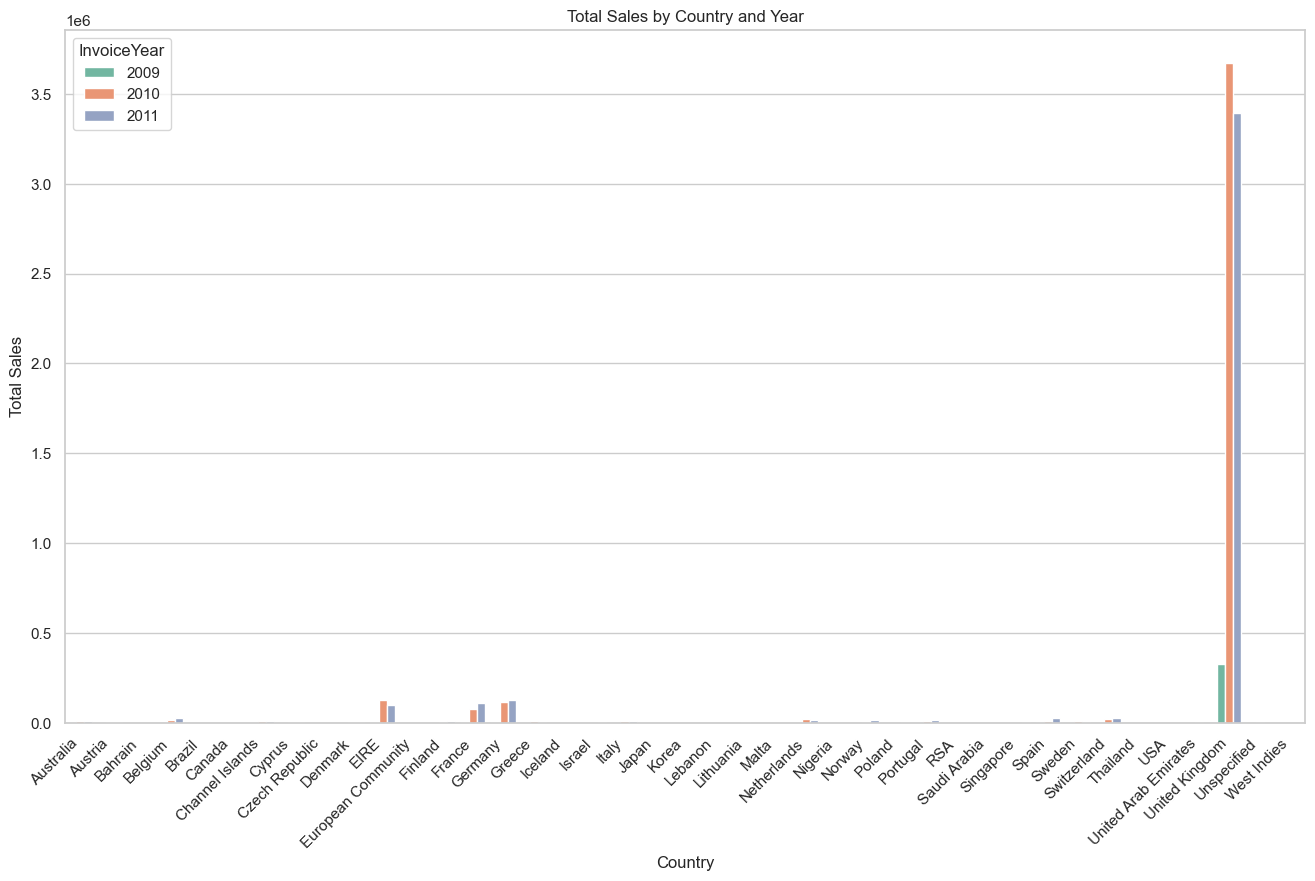

In [66]:
#Bar Plot
plt.figure(figsize=(16,9))
grouped_data = df_2.groupby(['Country', 'InvoiceYear']).agg({'Total_Sales': 'sum'}).reset_index()
sns.set(style='whitegrid')
ax = sns.barplot(x='Country', y='Total_Sales', hue='InvoiceYear', data=grouped_data, palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Total Sales by Country and Year')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

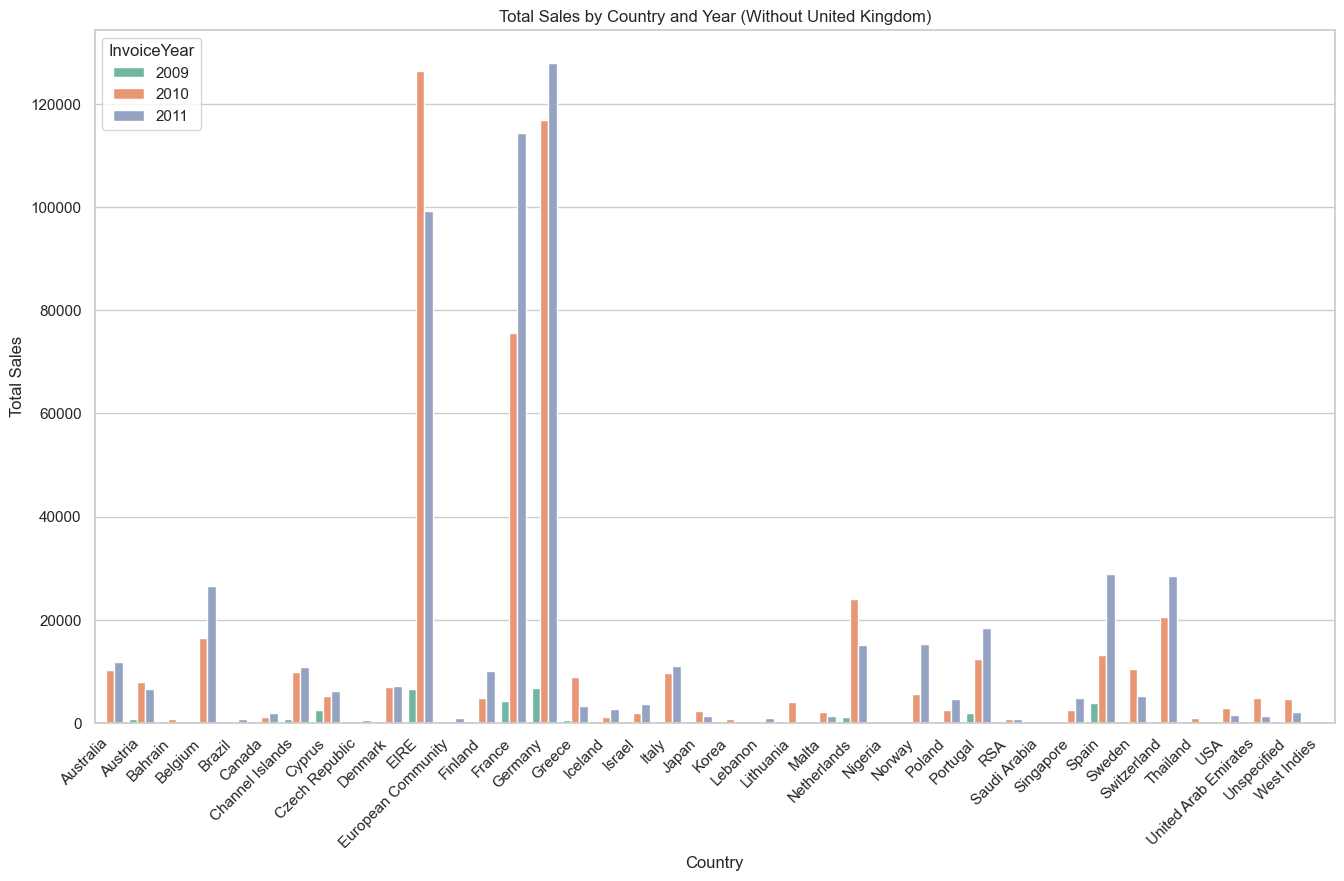

In [67]:
#Filter out UK
grouped_data = grouped_data[grouped_data['Country'] != 'United Kingdom']
plt.figure(figsize=(16,9))
ax = sns.barplot(x='Country', y='Total_Sales', hue='InvoiceYear', data=grouped_data, palette='Set2', errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Total Sales by Country and Year (Without United Kingdom)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()








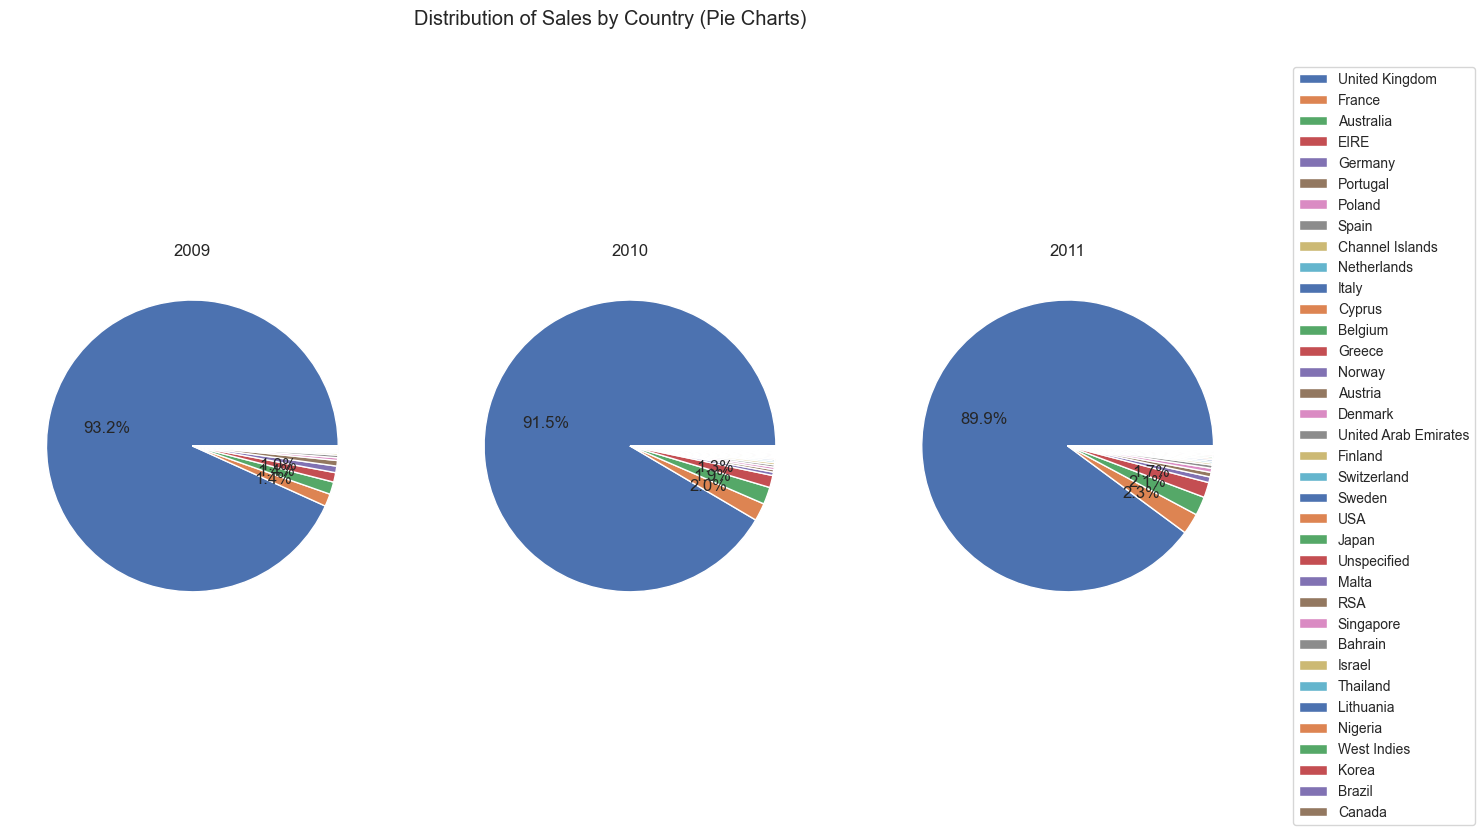

In [68]:
#Pie plot
df_2009 = df_2[df_2['InvoiceYear'] == 2009]
df_2010 = df_2[df_2['InvoiceYear'] == 2010]
df_2011 = df_2[df_2['InvoiceYear'] == 2011]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,9))
palette_2009 = sns.color_palette('pastel')[0:10]
palette_2010 = sns.color_palette('pastel')[1:11]
palette_2011 = sns.color_palette('pastel')[2:12]
sns.set(style='whitegrid')
sns.set_palette(palette_2009)
axes[0].pie(df_2009['Country'].value_counts(), labels=None, autopct=lambda pct: f"{pct:.1f}%" if pct > 0.9 else '')
axes[0].set_title('2009')
sns.set_palette(palette_2010)
axes[1].pie(df_2010['Country'].value_counts(), labels=None, autopct=lambda pct: f"{pct:.1f}%" if pct > 0.9 else '')
axes[1].set_title('2010')
sns.set_palette(palette_2011)
axes[2].pie(df_2011['Country'].value_counts(), labels=None, autopct=lambda pct: f"{pct:.1f}%" if pct > 0.9 else '')
axes[2].set_title('2011')
fig.suptitle('Distribution of Sales by Country (Pie Charts)')
plt.legend(labels=df_2['Country'].unique(),loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=10)
plt.show()


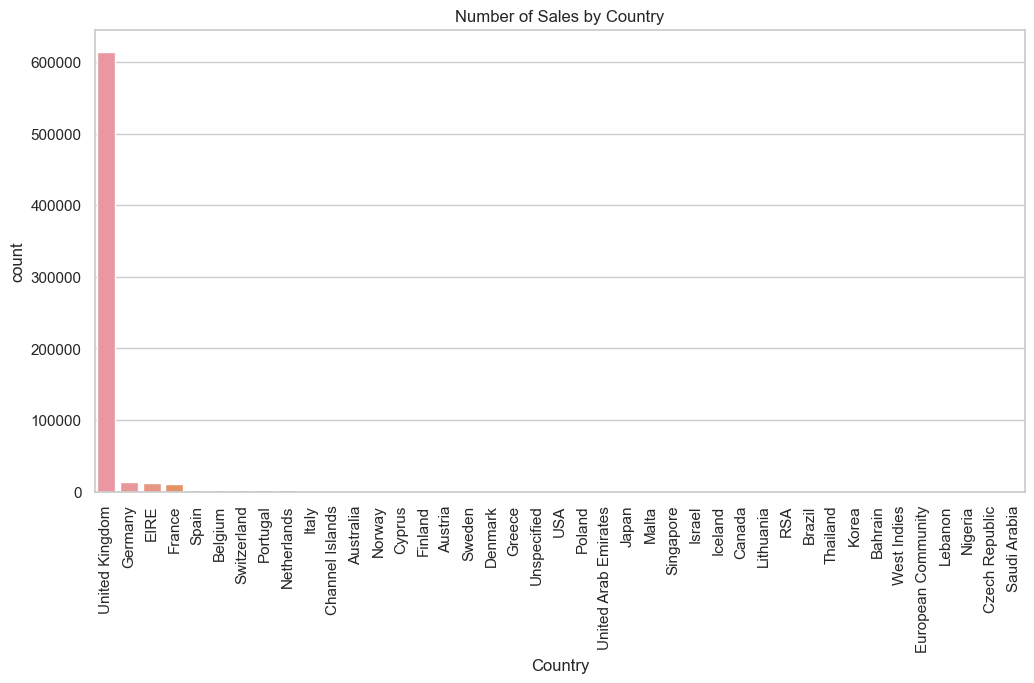

In [69]:
#Count plot 
df_2['InvoiceMonth'] = df_2['InvoiceDate'].dt.month

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x='Country', data=df_2, order=df_2['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Sales by Country')
plt.show()


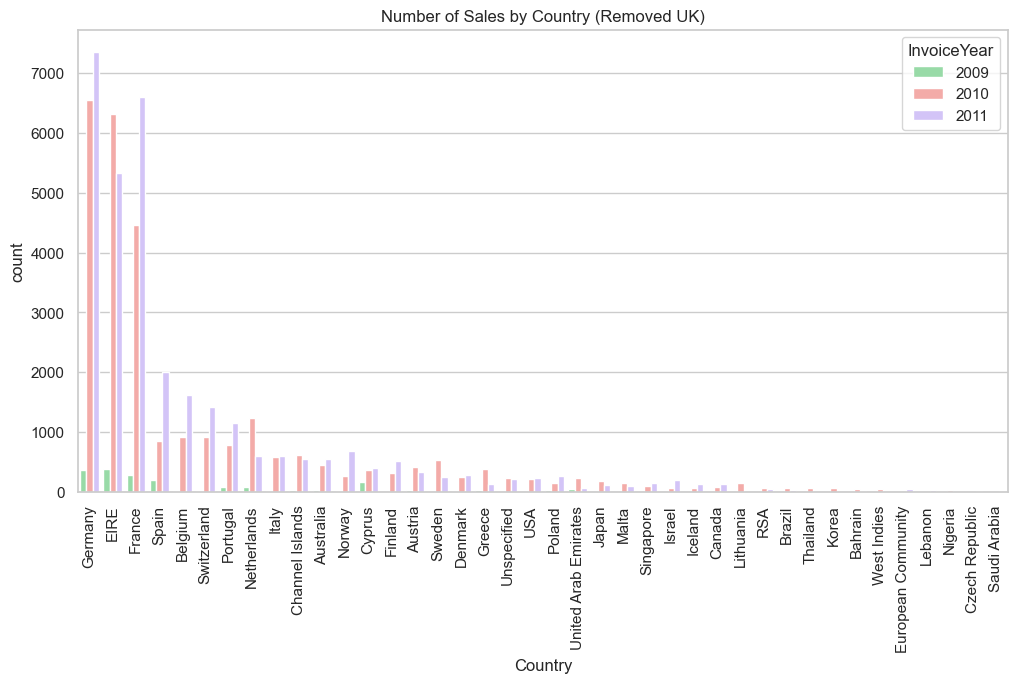

In [70]:
df_2_noUK = df_2[df_2['Country'] != 'United Kingdom']
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x='Country', data=df_2_noUK, hue = 'InvoiceYear',order=df_2_noUK['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Sales by Country (Removed UK)')
plt.show()

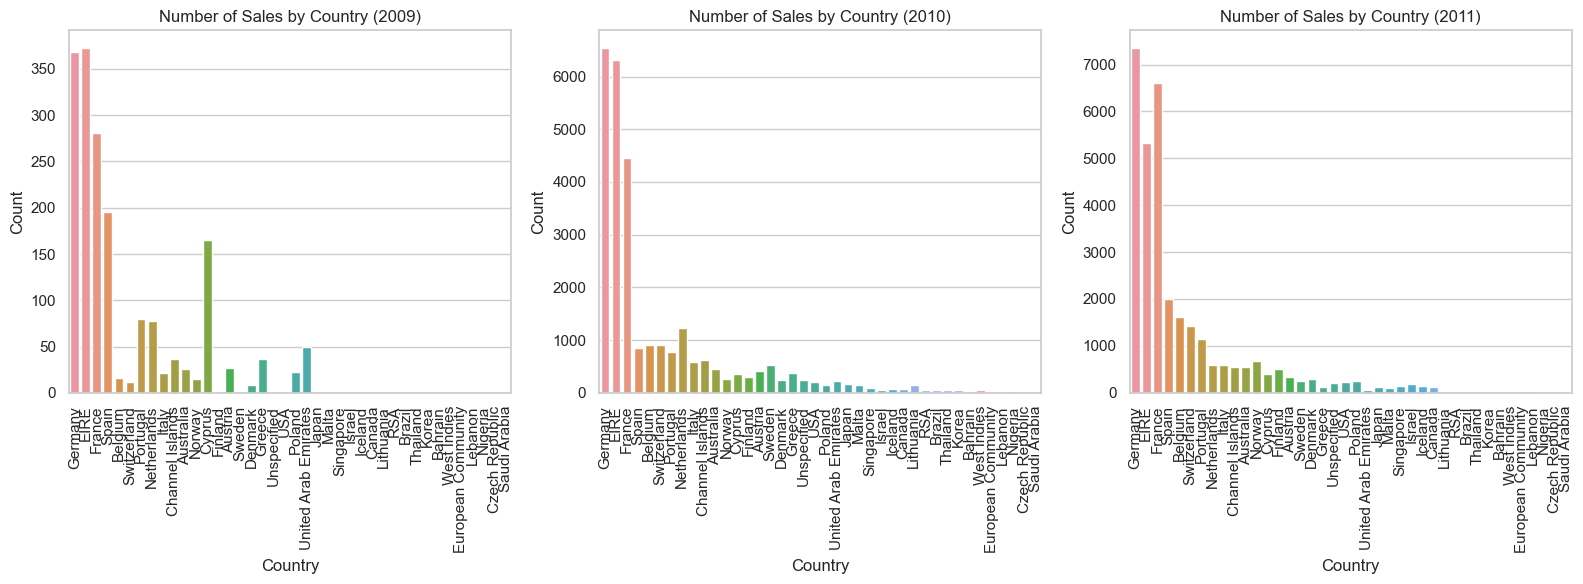

In [71]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
sns.countplot(x='Country', data=df_2_noUK[df_2_noUK['InvoiceYear']==2009], order=df_2_noUK['Country'].value_counts().index, ax=axes[0])
sns.countplot(x='Country', data=df_2_noUK[df_2_noUK['InvoiceYear']==2010], order=df_2_noUK['Country'].value_counts().index, ax=axes[1])
sns.countplot(x='Country', data=df_2_noUK[df_2_noUK['InvoiceYear']==2011], order=df_2_noUK['Country'].value_counts().index, ax=axes[2])
for i, year in enumerate([2009, 2010, 2011]):
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Number of Sales by Country ({year})')
plt.tight_layout()
plt.show()

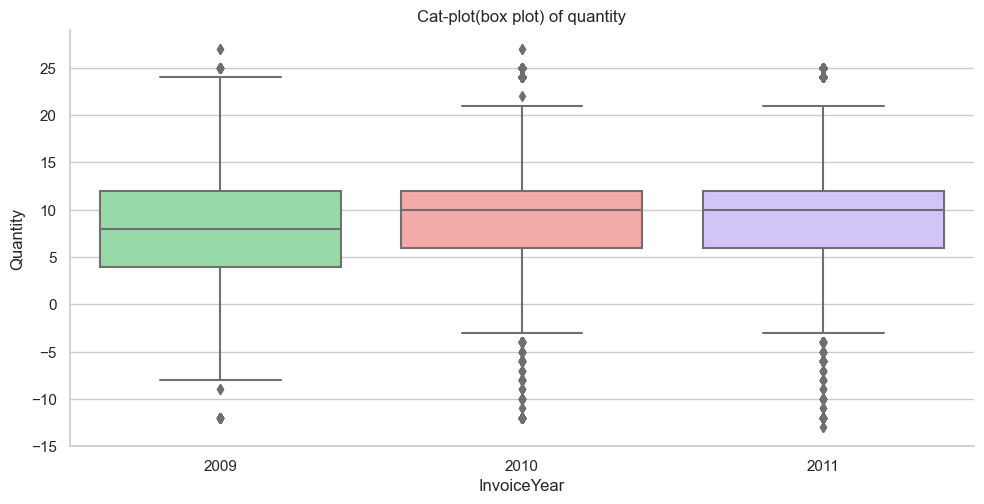

In [72]:
#Cat-plot
fig = sns.catplot(x='InvoiceYear', y='Quantity', data=df_2_noUK, kind='box', height=5, aspect=2)
fig.set(title = 'Cat-plot(box plot) of quantity')
plt.show()


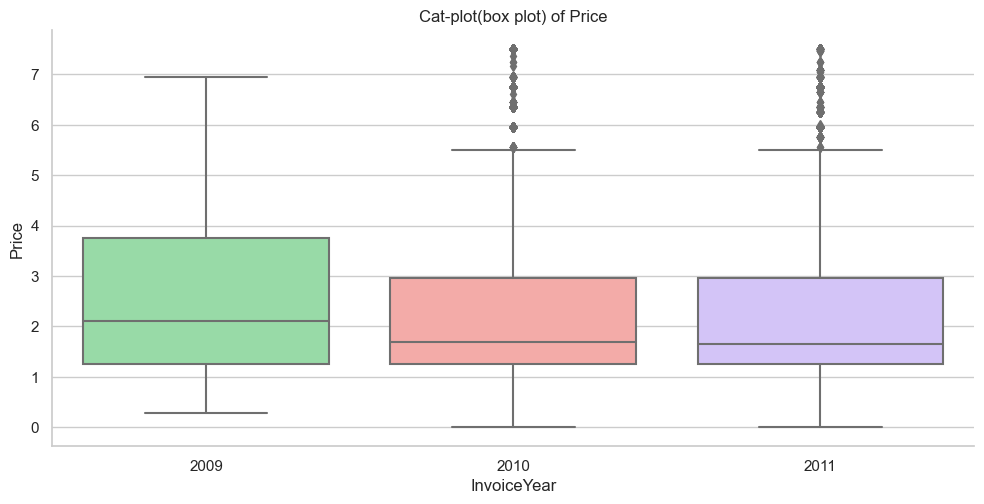

In [73]:
fig = sns.catplot(x='InvoiceYear', y='Price', data=df_2_noUK, kind='box', height=5, aspect=2)
fig.set(title = 'Cat-plot(box plot) of Price')
plt.show()

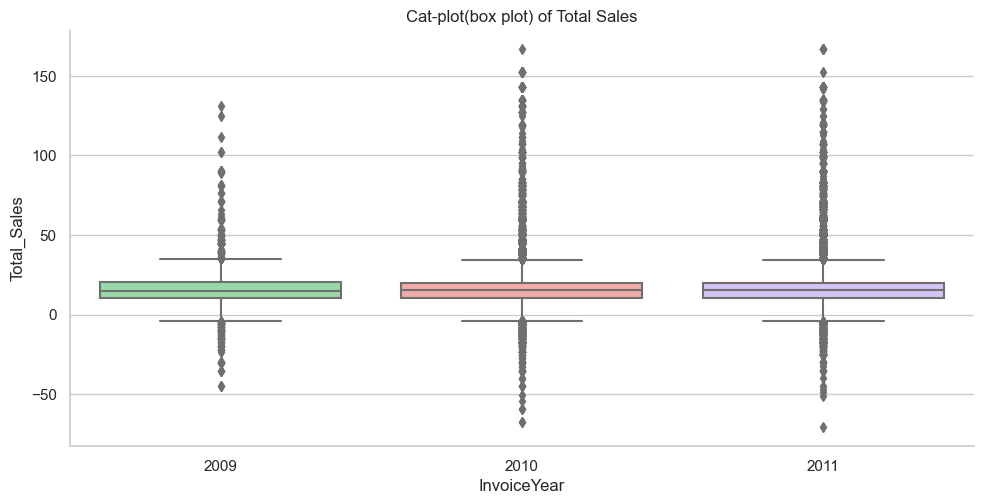

In [74]:
fig = sns.catplot(x='InvoiceYear', y='Total_Sales', data=df_2_noUK, kind='box', height=5, aspect=2)
fig.set(title = 'Cat-plot(box plot) of Total Sales')
plt.show()

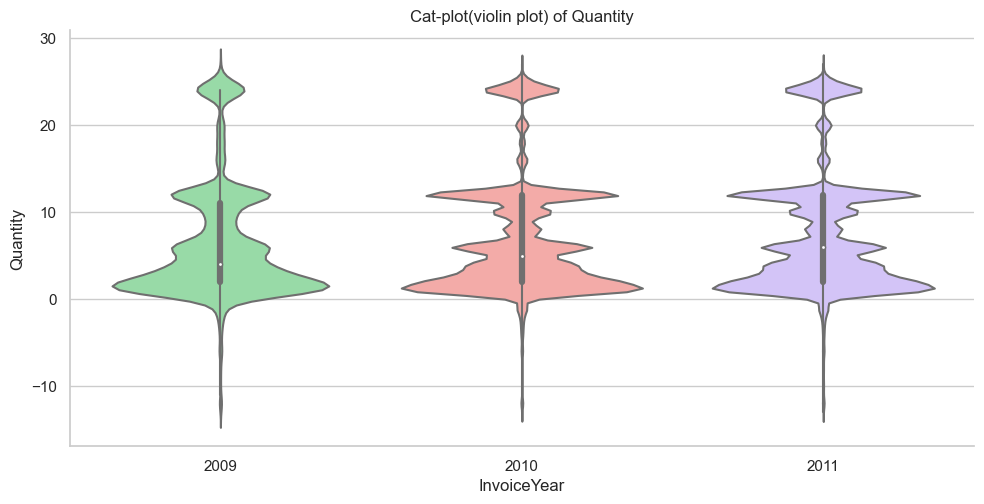

In [75]:
fig = sns.catplot(x='InvoiceYear', y='Quantity', data=df_2, kind='violin', height=5, aspect=2)
fig.set(title = 'Cat-plot(violin plot) of Quantity')
plt.show()

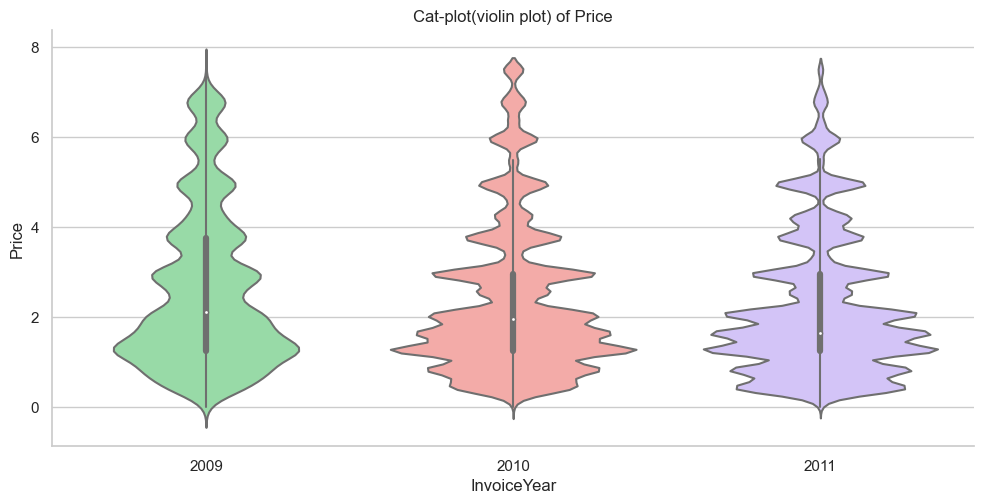

In [76]:
fig = sns.catplot(x='InvoiceYear', y='Price', data=df_2, kind='violin', height=5, aspect=2)
fig.set(title = 'Cat-plot(violin plot) of Price')
plt.show()

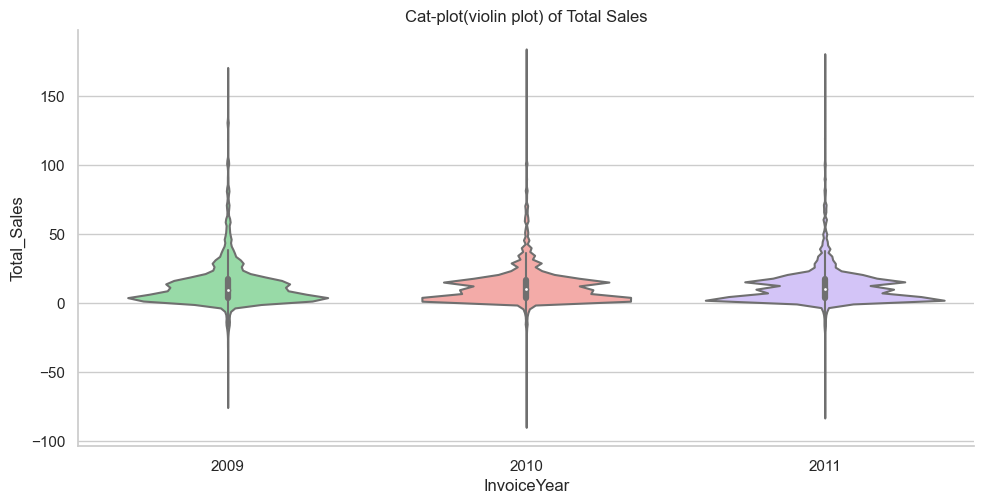

In [77]:
fig = sns.catplot(x='InvoiceYear', y='Total_Sales', data=df_2, kind='violin', height=5, aspect=2)
fig.set(title = 'Cat-plot(violin plot) of Total Sales')
plt.show()

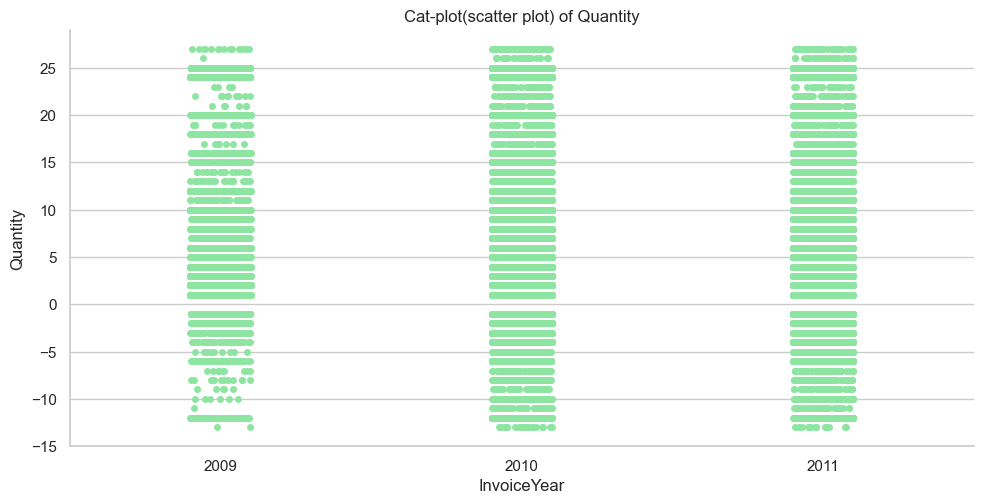

In [78]:
fig = sns.catplot(x='InvoiceYear', y='Quantity', data=df_2,  height=5, aspect=2)
fig.set(title = 'Cat-plot(scatter plot) of Quantity')
plt.show()

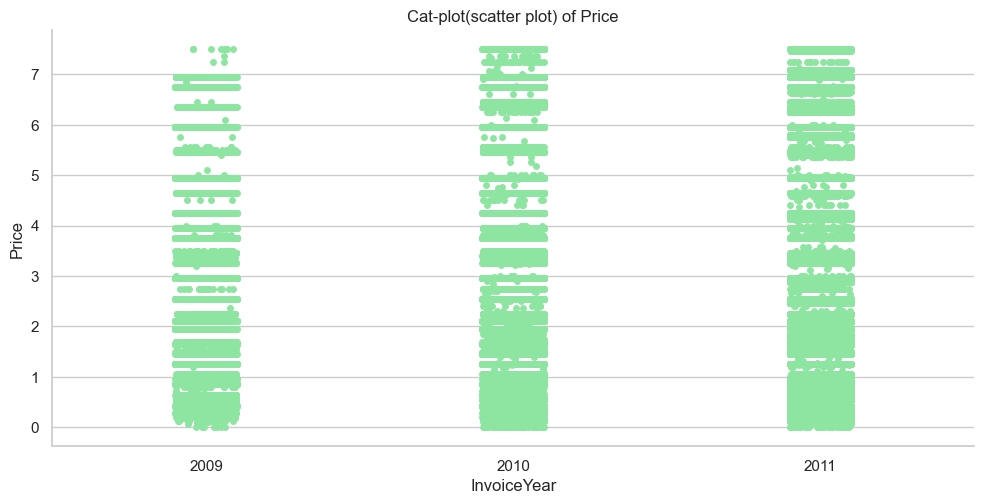

In [79]:
fig = sns.catplot(x='InvoiceYear', y='Price', data=df_2,  height=5, aspect=2)
fig.set(title = 'Cat-plot(scatter plot) of Price')
plt.show()

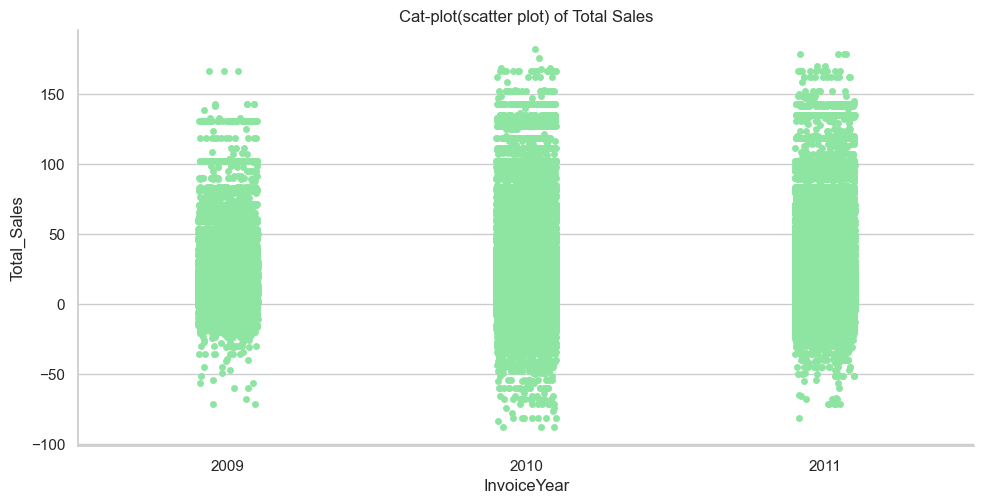

In [80]:
fig = sns.catplot(x='InvoiceYear', y='Total_Sales', data=df_2,  height=5, aspect=2)
fig.set(title = 'Cat-plot(scatter plot) of Total Sales')
plt.show()

Displot

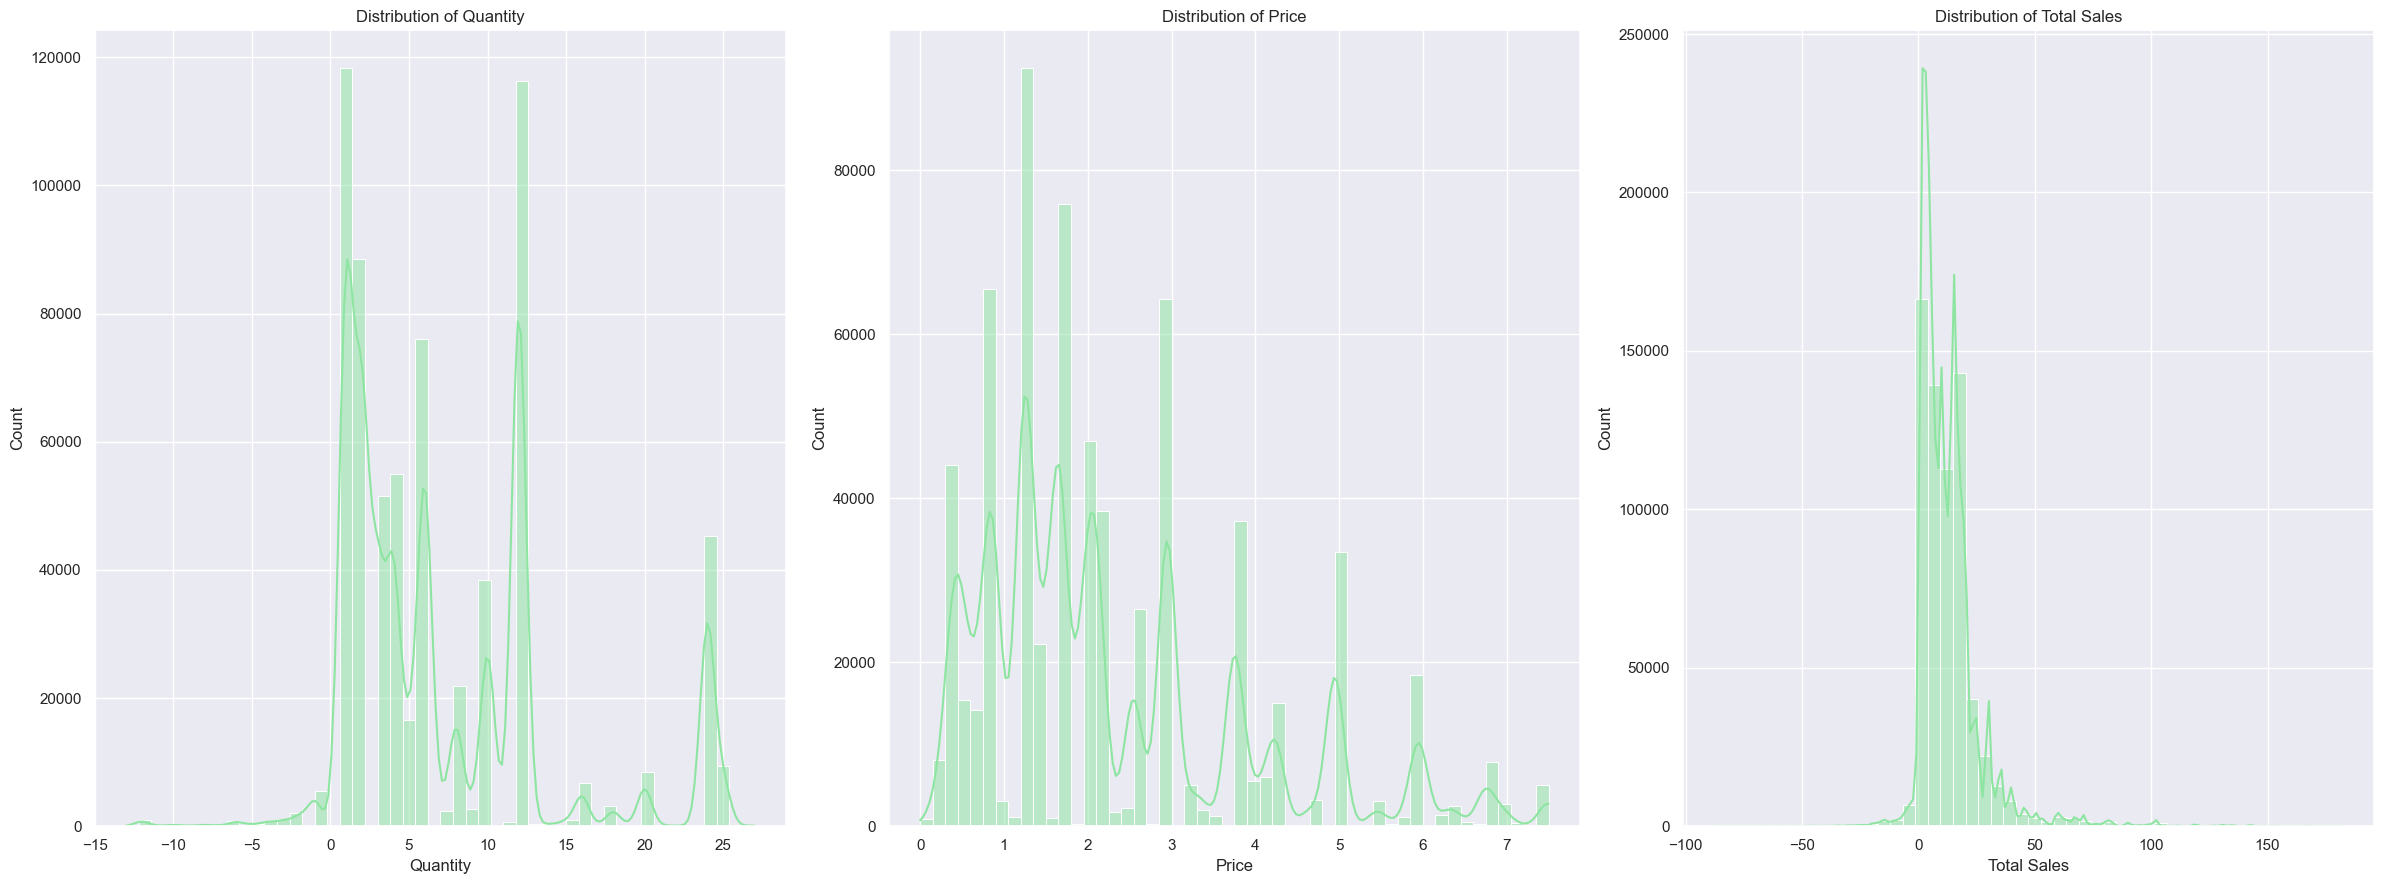

In [81]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 9))
sns.histplot(data=df_2, x='Quantity', bins=50, kde=True, ax=axes[0])
sns.histplot(data=df_2, x='Price', bins=50, kde=True, ax=axes[1])
sns.histplot(data=df_2, x='Total_Sales', bins=50, kde=True, ax=axes[2])

axes[0].set(title='Distribution of Quantity')
axes[0].set(xlabel='Quantity', ylabel='Count')
axes[1].set(title='Distribution of Price')
axes[1].set(xlabel='Price', ylabel='Count')
axes[2].set(title='Distribution of Total Sales')
axes[2].set(xlabel='Total Sales', ylabel='Count')

plt.tight_layout()
plt.show()


Line plot

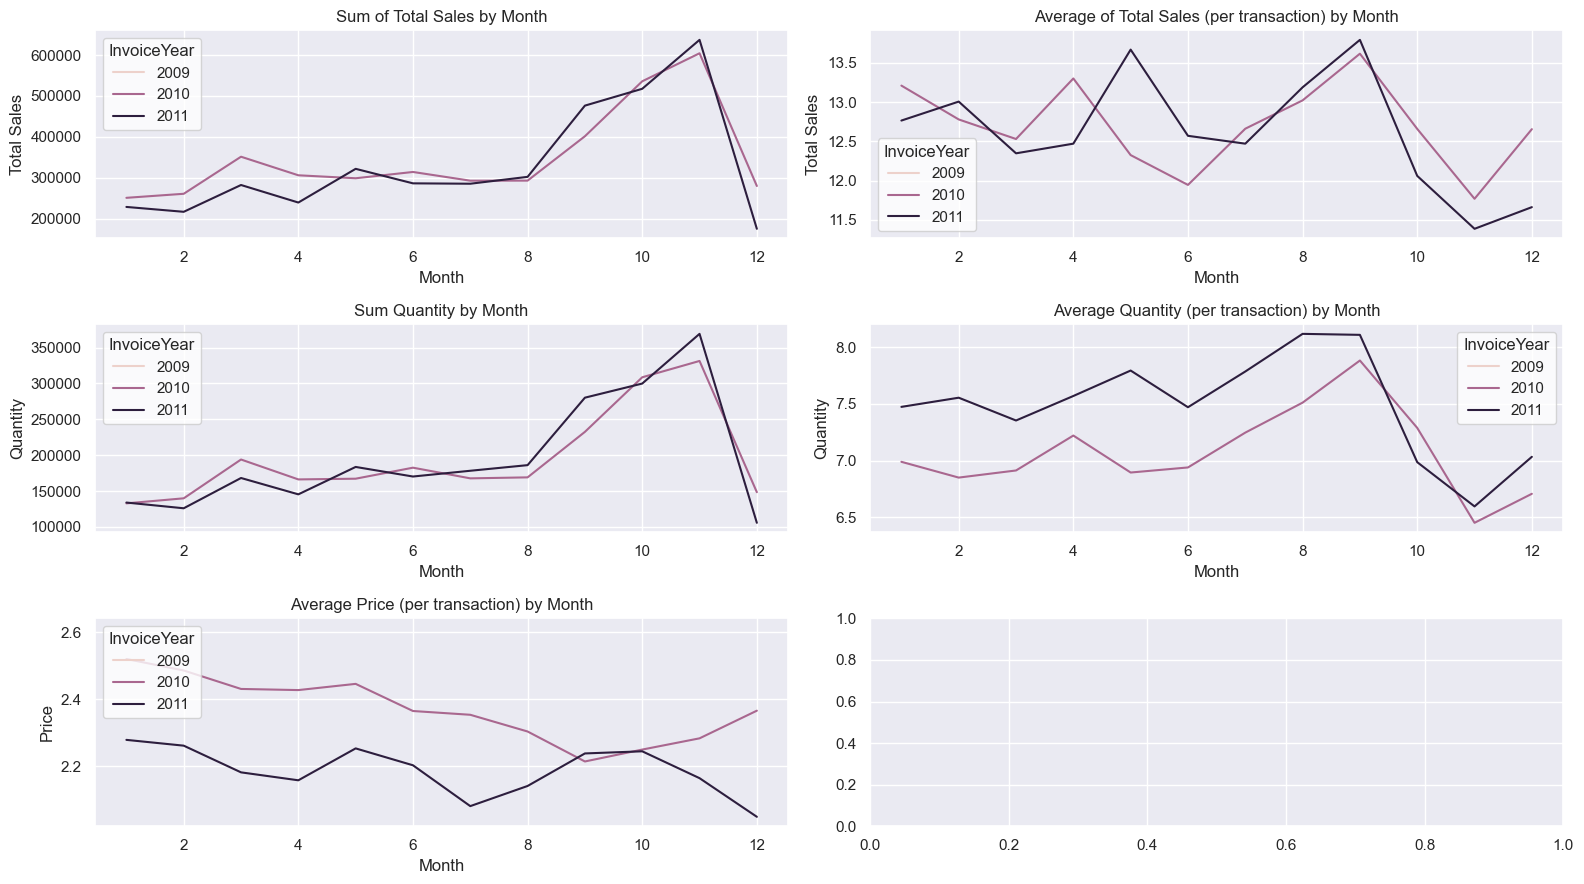

In [82]:

temp_sales_sum = df_2.groupby(['InvoiceYear', 'InvoiceMonth'])['Total_Sales'].sum().reset_index()
temp_sales_mean = df_2.groupby(['InvoiceYear', 'InvoiceMonth'])['Total_Sales'].mean().reset_index()
temp_qty_sum = df_2.groupby(['InvoiceYear', 'InvoiceMonth'])['Quantity'].sum().reset_index()
temp_qty_mean = df_2.groupby(['InvoiceYear', 'InvoiceMonth'])['Quantity'].mean().reset_index()
temp_price_sum = df_2.groupby(['InvoiceYear', 'InvoiceMonth'])['Price'].sum().reset_index()
temp_price_mean = df_2.groupby(['InvoiceYear', 'InvoiceMonth'])['Price'].mean().reset_index()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 9))
sns.set_style('whitegrid')

sns.lineplot(ax=axes[0, 0], data=temp_sales_sum, x='InvoiceMonth', y='Total_Sales', hue='InvoiceYear')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].set_title('Sum of Total Sales by Month')

sns.set_style('whitegrid')
sns.lineplot(ax=axes[0, 1], data=temp_sales_mean, x='InvoiceMonth', y='Total_Sales', hue='InvoiceYear')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Total Sales')
axes[0, 1].set_title('Average of Total Sales (per transaction) by Month')

sns.set_style('whitegrid')
sns.lineplot(ax=axes[1, 0], data=temp_qty_sum, x='InvoiceMonth', y='Quantity', hue='InvoiceYear')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Quantity')
axes[1, 0].set_title('Sum Quantity by Month')

sns.set_style('whitegrid')
sns.lineplot(ax=axes[1, 1], data=temp_qty_mean, x='InvoiceMonth', y='Quantity', hue='InvoiceYear')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Quantity')
axes[1, 1].set_title('Average Quantity (per transaction) by Month')

sns.set_style('whitegrid')
sns.lineplot(ax=axes[2, 0], data=temp_price_mean, x='InvoiceMonth', y='Price', hue='InvoiceYear')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Price')
axes[2, 0].set_title('Average Price (per transaction) by Month')
plt.tight_layout()
plt.show()


<Figure size 1600x1600 with 0 Axes>

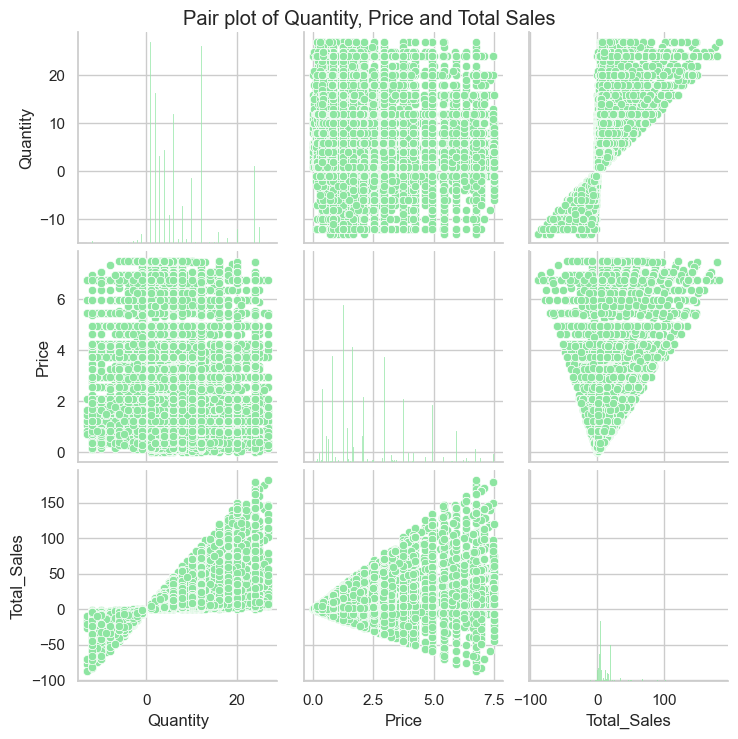

In [83]:
#pair plot
plt.figure(figsize=(16,16))
fig = sns.pairplot(data=df_2[['Quantity', 'Price', 'Total_Sales']])
fig.fig.suptitle('Pair plot of Quantity, Price and Total Sales')
plt.subplots_adjust(top=0.95)
plt.show()



Scatter plot and regression line using sklearn

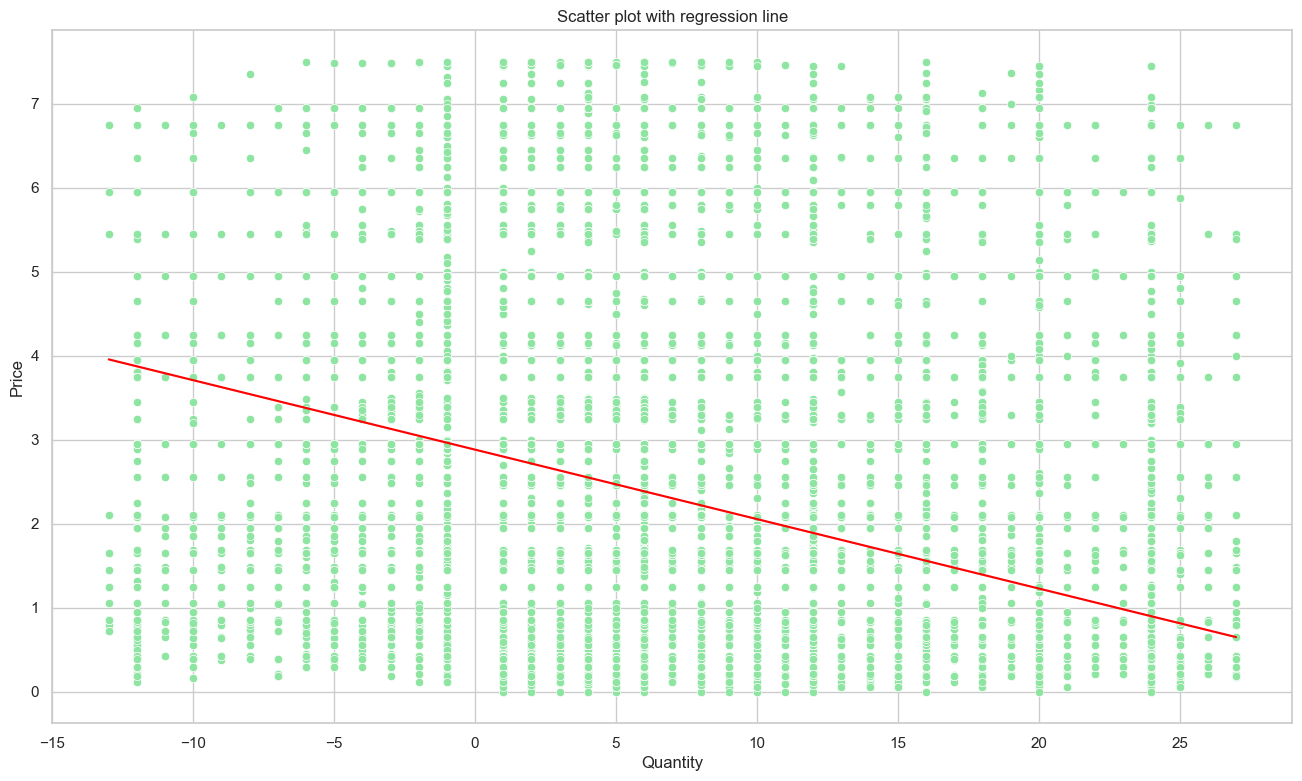

In [84]:
lr = LinearRegression()
X = df_2['Quantity'].values.reshape(-1,1)
y = df_2['Price'].values.reshape(-1,1)
lr.fit(X, y)
y_pred = lr.predict(X)
plt.figure(figsize=(16,9))
sns.scatterplot(data=df_2, x='Quantity', y='Price')
sns.lineplot(x=X.reshape(-1), y=y_pred.reshape(-1), color='red')
plt.title('Scatter plot with regression line')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

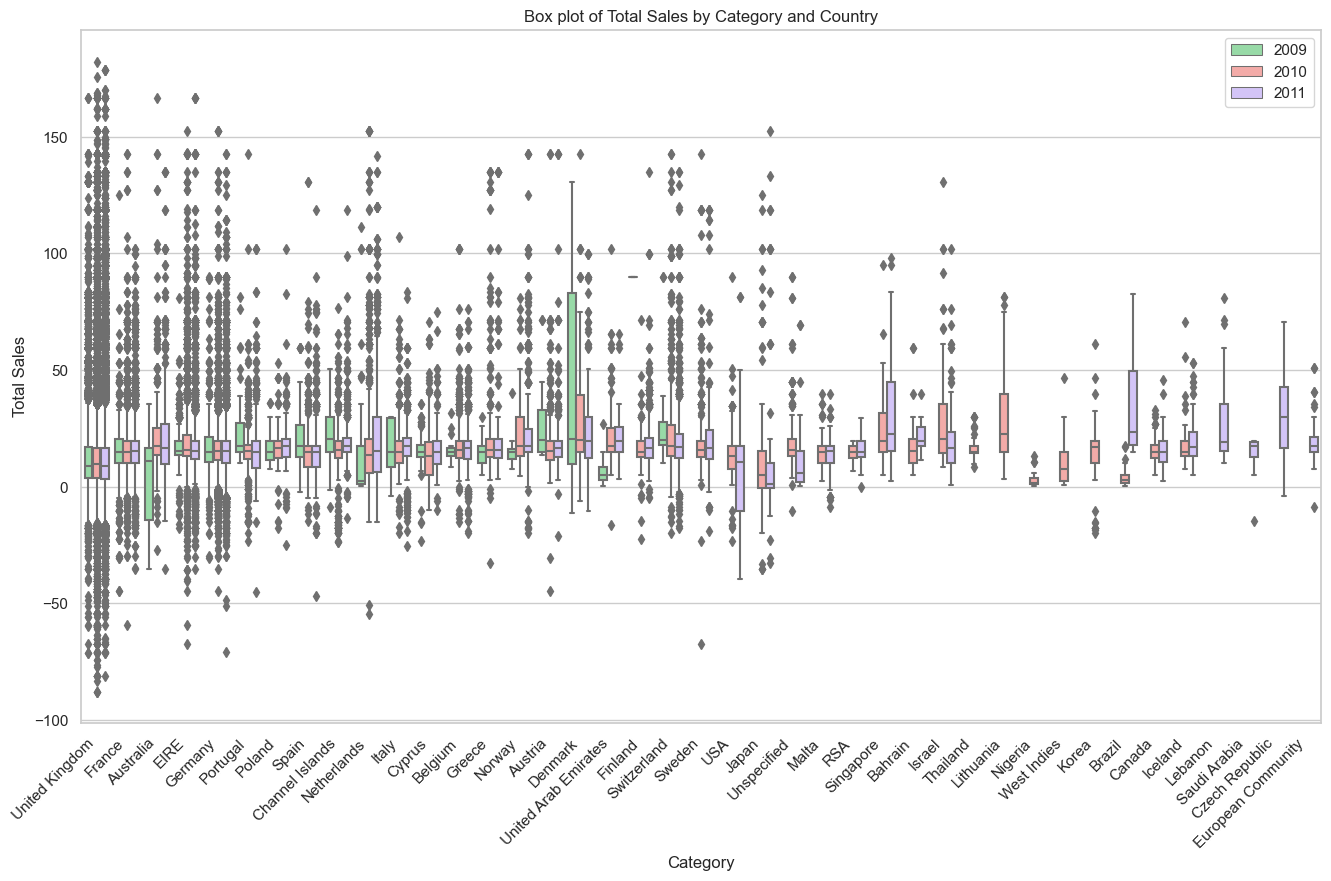

In [85]:
#Multivariate Box plot
plt.figure(figsize=(16,9))
sns.set_style('whitegrid')
sns.boxplot(x='Country', y='Total_Sales', hue='InvoiceYear', data=df_2)
plt.xticks(rotation=45, ha='right')
plt.title('Box plot of Total Sales by Category and Country')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.legend(loc='upper right')
plt.show()


Dashboard

In [86]:
#%%
import dash as dash
from dash import html 
from dash import dcc 
from dash.dependencies import Input, Output 
import plotly.express as px 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.fft import fft
from scipy.fft import fftfreq
import base64
from dash import dash_table
from dash.dependencies import Input, Output, State

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css'] 
my_app = dash.Dash('My app', external_stylesheets = external_stylesheets)
#%% Main file:

my_app.layout = html.Div([html.H1('Final Project', style={'textAlign': 'center'}),
                          html.H2('Study of Online Retail', style={'textAlign': 'center'}),
                          html.H5('Author: Jiazu Zhang',style={'textAlign': 'right'}),
                          html.Br(),
                          dcc.Tabs(id = 'hw-questions',
                                   children = [
                                       dcc.Tab(label = 'Graph of Selected Year', value = 'q1'),
                                       dcc.Tab(label = 'Purchase History Search', value = 'q2'),
                                       dcc.Tab(label = 'Statistical Graph Explorer', value = 'q3'),
                                   ]),
                          html.Div(id = 'layout')
]                 
)
#%% Part 1
df_before = pd.read_csv('online_retail_II_B2010.csv')
df_after = pd.read_csv('online_retail_II_After2010.csv')
frame = [df_before, df_after]
df = pd.concat(frame)
df = df.dropna()
df = df.drop_duplicates()

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
outliers = (df['Price'] < lower_bound) | (df['Price'] > upper_bound)

df = df[~outliers]
df = df.dropna()

Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
outliers = (df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)

df = df[~outliers]
df = df.dropna()

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['Total_Sales'] = df['Price'] * df['Quantity']

part1_layout = html.Div([
    html.H3('Graph of Sum/Average/Median of Price/Quantity/Total Sales for Selected Year', style={'textAlign': 'left'}),
    dcc.Graph(id='my-graph'),
    html.P("Select the Year"),
    dcc.Slider(
        id='year-slider',
        min=df['InvoiceYear'].min(),
        max=df['InvoiceYear'].max(),
        step=1,
        value=df['InvoiceYear'].min(),
        marks={str(year): str(year) for year in df['InvoiceYear'].unique()},
    ),
    html.P("Pick the Method:"),
    dcc.Dropdown(id='method',
                 options=[
                     {'label': 'Sum', 'value': 'Sum'},
                     {'label': 'Average', 'value': 'Average'},
                     {'label': 'Median', 'value': 'Median'},
                 ],
                 value='Sum',
                 multi=False),
    html.P("Pick the Target:"),
    dcc.Dropdown(id='target',
                 options=[
                     {'label': 'Total Sales', 'value': 'Total_Sales'},
                     {'label': 'Quantity', 'value': 'Quantity'},
                     {'label': 'Price', 'value': 'Price'},
                 ],
                 value='Total_Sales',
                 multi=False),
])

@my_app.callback(
    Output(component_id='my-graph', component_property='figure'),
    [Input(component_id='year-slider', component_property='value'),
     Input(component_id='method', component_property='value'),
     Input(component_id='target', component_property='value')]
)
def update_figure(year, method, target):
    df_filtered = df[df['InvoiceYear'] == year]
    if method == 'Sum':
        if target == 'Total_Sales':
            temp = df_filtered.groupby(['InvoiceYear', 'InvoiceMonth'])['Total_Sales'].sum().reset_index()
        elif target == 'Quantity':
            temp = df_filtered.groupby(['InvoiceYear', 'InvoiceMonth'])['Quantity'].sum().reset_index()
        elif target == 'Price':
            temp = df_filtered.groupby(['InvoiceYear', 'InvoiceMonth'])['Price'].sum().reset_index()
    elif method == 'Average':
        if target == 'Total_Sales':
            temp = df_filtered.groupby(['InvoiceYear', 'InvoiceMonth'])['Total_Sales'].mean().reset_index()
        elif target == 'Quantity':
            temp = df_filtered.groupby(['InvoiceYear', 'InvoiceMonth'])['Quantity'].mean().reset_index()
        elif target == 'Price':
            temp = df_filtered.groupby(['InvoiceYear', 'InvoiceMonth'])['Price'].mean().reset_index()
    elif method == 'Median':
        if target == 'Total_Sales':
            temp = df_filtered.groupby(['InvoiceYear', 'InvoiceMonth'])['Total_Sales'].median().reset_index()
        elif target == 'Quantity':
            temp = df_filtered.groupby(['InvoiceYear', 'InvoiceMonth'])['Quantity'].median().reset_index()
        elif target == 'Price':
            temp = df_filtered.groupby(['InvoiceYear', 'InvoiceMonth'])['Price'].median().reset_index()    
    fig = px.line(temp, x='InvoiceMonth', y=target)
    
    return fig


# %% Part 2:
df['Customer ID'] = df['Customer ID'].astype(str)
print(df.head())

part2_layout = html.Div([
    html.H3('Data Search Engine', style={'textAlign': 'left'}),
    
    html.Br(),
    html.P('Please first select the key you want to search.'),
    dcc.Dropdown(id='key',
                 options=[
                     {'label': 'Invoice', 'value': 'Invoice'},
                     {'label': 'StockCode', 'value': 'StockCode'},
                     {'label': 'Customer ID', 'value': 'Customer ID'},
                     {'label': 'Country', 'value': 'Country'},
                     {'label': 'Description', 'value': 'Description'},
                 ],
                 value='Invoice',
                 multi=False),
    
    html.Br(),
    dcc.Input(id='input', value='', type='text'),
    html.Button('Submit', id='submit'),
    html.Div(id='output')
])

@my_app.callback(
    Output('output', 'children'),
    [Input('submit', 'n_clicks')],
    [State('key', 'value'),
     State('input', 'value')])

def update_output(n_clicks,key,value):
    if not value:
        return html.Div(f'Please enter a {key}.')
    else:
        filtered_df = df[df[key] == value]
        if filtered_df.empty:
            return html.Div(f'{key} not found.')
        else:
            return dash_table.DataTable(
                id='table',
                columns=[{"name": i, "id": i} for i in filtered_df.columns],
                data=filtered_df.to_dict('records'),
                export_format="csv"
            )



# %% Part 3:

part3_layout = html.Div([
    html.H3('Statistical Graph Explorer', style={'textAlign': 'left'}),
    
    html.Br(),
    html.P('Please select the graph you want to see:'),
    dcc.RadioItems(id='graph',
                 options=[
                     {'label': 'Box plot', 'value': 'Box plot'},
                     {'label': 'Violin plot', 'value': 'Violin plot'},
                     {'label' : 'Hist-plot', 'value': 'Histplot'},
                     {'label': 'Pie-chart (Will display all countries)', 'value': 'Pie-chart'},
                 ],
                 value='Box plot',
                 ),
    
    html.Br(),
    html.P("Please select the country you want to explor:"),
    dcc.Dropdown(id= 'Country',
                 options = [
                     {'label': 'United Kingdom','value': 'United Kingdom'},    
                     {'label': 'France','value': 'France'},    
                     {'label': 'Australia', 'value': 'Australia'},    
                     {'label': 'EIRE', 'value': 'EIRE'},    
                     {'label': 'Germany','value': 'Germany'},    
                     {'label': 'Portugal', 'value': 'Portugal'},    
                     {'label': 'Poland', 'value': 'Poland'},    
                     {'label': 'Spain', 'value': 'Spain'},    
                     {'label': 'Channel Islands', 'value': 'Channel Islands'},    
                     {'label': 'Netherlands', 'value': 'Netherlands'},    
                     {'label': 'Italy', 'value': 'Italy'},    
                     {'label': 'Cyprus', 'value': 'Cyprus'},    
                     {'label': 'Belgium', 'value': 'Belgium'},    
                     {'label': 'Greece', 'value': 'Greece'},    
                     {'label': 'Norway', 'value': 'Norway'},    
                     {'label': 'Austria', 'value': 'Austria'},    
                     {'label': 'Denmark', 'value': 'Denmark'},    
                     {'label': 'United Arab Emirates', 'value': 'United Arab Emirates'},    
                     {'label': 'Finland', 'value': 'Finland'},    
                     {'label': 'Switzerland', 'value': 'Switzerland'},    
                     {'label': 'Sweden', 'value': 'Sweden'},    
                     {'label': 'USA', 'value': 'USA'},    
                     {'label': 'Japan', 'value': 'Japan'},    
                     {'label': 'Unspecified', 'value': 'Unspecified'},    
                     {'label': 'Malta', 'value': 'Malta'},    
                     {'label': 'RSA', 'value': 'RSA'},    
                     {'label': 'Singapore', 'value': 'Singapore'},    
                     {'label': 'Bahrain', 'value': 'Bahrain'},    
                     {'label': 'Israel', 'value': 'Israel'},    
                     {'label': 'Thailand', 'value': 'Thailand'},    
                     {'label': 'Lithuania', 'value': 'Lithuania'},    
                     {'label': 'Nigeria', 'value': 'Nigeria'},    
                     {'label': 'West Indies', 'value': 'West Indies'},    
                     {'label': 'Korea', 'value': 'Korea'},    
                     {'label': 'Brazil', 'value': 'Brazil'},    
                     {'label': 'Canada', 'value': 'Canada'},    
                     {'label': 'Iceland', 'value': 'Iceland'},    
                     {'label': 'Lebanon', 'value': 'Lebanon'},    
                     {'label': 'Saudi Arabia', 'value': 'Saudi Arabia'},
                     {'label': 'Czech Republic', 'value': 'Czech Republic'},
                     {'label': 'European Community', 'value': 'European Community'},
                 ],
                 value = 'United Kingdom',
                 multi = False),
    
    html.Br(),
    html.P("Please Select the data column you want to explor:"),
    dcc.RadioItems(id='column',
                 options=[
                     {'label': 'Price', 'value': 'Price'},
                     {'label': 'Quantity', 'value': 'Quantity'},
                     {'label': 'Total Sales', 'value': 'Total_Sales'},
                 ],
                 value='Price'
                 ),    
    html.Br(),
    dcc.Graph(id = 'finalgraph'),
    
])

@my_app.callback(
        [Output(component_id= 'finalgraph',component_property= 'figure')],
         [Input(component_id='graph', component_property='value'),
          Input(component_id='Country', component_property='value'),
          Input(component_id='column', component_property='value')]
)

def output(graph, country, column):
    if graph == 'Box plot':
        fig = px.box(df[df['Country'] == country], y=column, x='InvoiceYear')
        return (fig,)
    elif graph == 'Violin plot':
        fig = px.violin(df[df['Country'] == country], y=column, x='InvoiceYear', box=True)
        return (fig,)
    elif graph == 'Pie-chart':
        temp2 = df.groupby(['Country']).sum().reset_index()
        fig = px.pie(temp2, values=column, names='Country', title=f'{column}% of countries', height=1000, width=800)
        fig.update_traces(textposition='inside', textinfo='percent+label')
        fig.update_layout(legend_title='Country')
        return (fig,)
    elif graph == 'Histplot':
        fig = px.histogram(df[df['Country'] == country], x = 'InvoiceYear', y = column,color= 'InvoiceMonth', barmode= 'group' )
        return (fig,)




@my_app.callback(Output(component_id='layout', component_property='children'),
                 [Input(component_id='hw-questions', component_property='value')])

def update_layout(ques):
    if ques == 'q1':
        return part1_layout
    elif ques == 'q2':
        return part2_layout
    elif ques == 'q3':
        return part3_layout



my_app.run_server(
        port=8056,
        host='0.0.0.0')
# %%


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   

          InvoiceDate  Price Customer ID         Country  InvoiceYear  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom         2009   
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom         2009   
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom         2009   
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom         2009   
5 2009-12-01 07:45:00   1.65     13085.0  United Kingdom         2009   

   InvoiceMonth  Total_Sales  
0            12         83.4  
1            12         81.0  
2            12         81.0  
4            12 

 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8056
 * Running on http://192.168.1.154:8056
Press CTRL+C to quit
